# Proyecto final



**Estudiante:** [Luis Alfredo Denis Garcia]

## Introducción




1.  **Definición de Objetivos:** Saber que locales y productos tienen mayor rentavilidad o movimiento.
2.  **Recopilación de Datos:** Obtener el conjunto de datos de una fuente confiable.
3.  **Importar Librerías:** Cargar las librerías necesarias para el análisis (como `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`).
4.  **Carga de Datos:** Leer el conjunto de datos en un DataFrame (generalmente usando `pandas`).
5.  **Inspección Inicial:**
    -   Mostrar las primeras filas (`.head()`).
    -   Ver información general del DataFrame (`.info()`).
    -   Obtener estadísticas descriptivas (`.describe()`).
6.  **Limpieza de Datos:**
    -   Identificar y manejar valores faltantes.
    -   Detectar y tratar datos atípicos (outliers).
    -   Corregir o eliminar datos erróneos o inconsistentes.
    -   Convertir tipos de datos si es necesario.
7.  **Análisis Univariado:** Examinar cada variable individualmente.
    -   Estadísticas descriptivas.
    -   Visualizaciones (histogramas, diagramas de caja, gráficos de barras, etc.).
    -   Medidas de Tendencia Central y Dispersión.
    -   Análisis de Curtosis y Asimetría.
8.  **Análisis Bivariado:** Explorar las relaciones entre pares de variables.
    -   Diagramas de dispersión, correlación, boxplots, tablas de contingencia, etc.
10. **Extracción de Conclusiones:** Resumir los hallazgos y responder a las preguntas planteadas inicialmente.
11. **Comunicación de Resultados:** Presentar los resultados de forma clara y concisa, utilizando visualizaciones y explicaciones adecuadas.


## 1. Importar las librerías necesarias

Importa aquí las librerías que utilizarás. Recuerda que además de las principales para EDA, para los nuevos analisis usaremos:

-   **`pandas`:** Para la manipulación y análisis de datos.
-   **`numpy`:** Para operaciones numéricas.
-   **`matplotlib.pyplot`:** Para la creación de gráficos.
-   **`seaborn`:** Para visualizaciones estadísticas más atractivas y complejas.
-   **`scipy.stats`:** Para análisis estadísticos, incluyendo curtosis, asimetría, y funciones de probabilidad.

Si necesitas librerías adicionales, puedes importarlas también.

In [12]:
# -- Importamos las librerias --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y descripción general del conjunto de datos

**2.1 Carga del conjunto de datos:**

- Utiliza `pandas` para cargar tu conjunto de datos en un DataFrame. 
- Asegurate de especificar correctamente la ruta del archivo. Puedes usar archivos CSV, Excel, JSON, u otros formatos soportados por `pandas`.

**2.2 Inspección Inicial:**

-   Muestra las primeras filas del DataFrame usando `.head()` para tener una idea general de su estructura.
-   Utiliza `.info()` para obtener un resumen de las columnas, tipos de datos y valores no nulos.
-   Utiliza `.describe()` para obtener estadísticas descriptivas de las variables numéricas.

In [13]:
# -- primero realizo la carga de mis datos, luego una inspeccion inicial--
data = pd.read_csv('D:\global electronic\proyfinal4.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    62884 non-null  int64  
 1   Line Item       62884 non-null  int64  
 2   Order Date      62884 non-null  object 
 3   Delivery Date   13165 non-null  object 
 4   CustomerKey     62884 non-null  int64  
 5   StoreKey        62884 non-null  int64  
 6   ProductKey      62884 non-null  int64  
 7   Quantity        62884 non-null  int64  
 8   Product Name    62884 non-null  object 
 9   Brand           62884 non-null  object 
 10  Color           62884 non-null  object 
 11  Unit Cost USD   62884 non-null  float64
 12  Unit Price USD  62884 non-null  float64
 13  SubcategoryKey  62884 non-null  int64  
 14  Subcategory     62884 non-null  object 
 15  CategoryKey     62884 non-null  int64  
 16  Category        62884 non-null  object 
 17  Country         62884 non-null 

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity,Unit Cost USD,Unit Price USD,SubcategoryKey,CategoryKey,Square Meters,Total Profit
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,49719.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790,124.008572,299.327629,450.198238,4.469611,1594.442869,554.154965
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371,152.662335,417.038154,212.710652,2.132682,461.800495,1140.076158
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000,0.380650,0.753370,101.000000,1.000000,245.000000,0.372720
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000,24.555100,51.683974,303.000000,3.000000,1260.000000,62.601740
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000,82.770000,188.000000,501.000000,5.000000,1715.000000,205.669380
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000,153.454374,349.599417,602.000000,6.000000,2000.000000,583.068993
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000,1487.819253,4490.583778,808.000000,8.000000,2105.000000,24022.116194


In [14]:
print(data.columns)

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Product Name',
       'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category', 'Country', 'State',
       'Square Meters', 'Open Date', 'Date', 'Total Profit'],
      dtype='object')


**2.3 Conclusiones de la Inspección Inicial:**

Escribe aquí tus observaciones iniciales sobre el conjunto de datos:

-   ¿Qué tipos de variables hay?
Este dataset tiene 23 columnas.
Tiene variables Numéricas:
 Enteras (int64): Order Number, Line Item, CustomerKey, StoreKey, ProductKey, Quantity, CategoryKey.
 Decimales (float64): Unit Cost USD, Unit Price USD, Total Profit, Square Meters.

Tambien Variables Categóricas (Object):Product Name, Brand, Color, Subcategory, Category, Country, State
Order Date, Delivery Date, Open Date, Date: Fechas en formato texto.

-   ¿Hay valores faltantes evidentes?
Delivery Date tiene muchos valores nulos, lo que sugiere que no todas las ventas incluyen una fecha de entrega.
Square Meters también tiene valores faltantes, lo cual podría significar que algunas sucursales no tienen información registrada sobre su tamaño.
Delivery Date: 49,719 valores nulos
Square Meters: 12,165 valores nulos

-   ¿Qué te llama la atención de las estadísticas descriptivas?
Cantidad de productos por venta (Quantity):
Media (Mean): 3.14 → En promedio, cada venta contiene alrededor de 3 productos.
Desviación estándar (Std Dev): 2.25 → Hay una gran variabilidad en la cantidad de productos vendidos por transacción.
Mínimo (Min): 1 → Hay ventas donde solo se vende un producto.
Máximo (Max): 10 → Algunas transacciones incluyen hasta 10 productos


Costo y precio unitario:
Costo unitario promedio (Unit Cost USD): $124
Mínimo: $0.38 (muy bajo, posible error)
Máximo: $3,000+ (producto de alto valor)
Precio unitario promedio (Unit Price USD): $299.3
Mínimo: $0.38 (muy bajo, posible error)
Máximo: $3,000 (producto de alto valor)
La diferencia entre el costo y el precio unitario sugiere que hay un margen de ganancia razonable de $175.3, en promedio, en cada unidad vendida.



Valores extremos y posibles outliers
El Total Profit varía entre $0.32 y $24022, lo que indica la presencia de transacciones con ganancias muy bajas y otras con ganancias muy altas.



In [15]:
# Los datos parecen estar correctamente estructurados, pero las fechas están en formato texto, lo cual podría dificultar el análisis temporal.
# Se deben tomar decisiones sobre cómo manejar los valores nulos, ya que podrían influir en el análisis de ventas y rendimiento por sucursal.
# Hay productos y transacciones con diferencias extremas en costos, precios y ganancias, lo que sugiere la presencia de valores atípicos. 
# Esto requerirá una revisión más profunda antes de realizar cualquier análisis de tendencias. --

## 3. Limpieza de datos

En este paso, aborda los problemas identificados en la inspección inicial. Las acciones comunes incluyen:

**3.1 Manejo de Valores Faltantes:**
Decidi rellenar los valores nulos de la columna  Delivery Date con la fecha del pedido Order Date, para
no eliminar ninguna fila y perder informacion valiosa.

Tambien en la columna Square Meters algunas sucursales no tienen datos sobre su tamaño. Podrían ser sucursales online o datos faltantes. Asi que decidi rellenar valores nulos con la media de las sucursales físicas.

**3.2 Manejo de Datos Atípicos (Outliers):**



**3.3 Corrección de Tipos de Datos:**
decidi estandarizar nombres de columnas, para evitar errores al trabajar con nombres de columnas.
Convirtiendo los nombres de columnas a minúsculas y reemplazando espacios por guiones bajos.

**3.4 Otros Problemas:**

Encontre que hay varias monedas y decidi unificarlas a USD para un mejor analisis.

**Documenta todas las decisiones y transformaciones que realices.**

In [16]:
# --Primero, identificamos qué columnas almacenan fechas en formato texto (object).
dato_columnas = ["Order Date", "Delivery Date", "Open Date"]  

# Convertirlas a datetime
# usamos la función pd.to_datetime(), que convierte los valores en formato de fecha. La opción errors='coerce' nos permite manejar errores, convirtiendo valores inválidos en NaT (Not a Time)
for col in dato_columnas:
    data[col] = pd.to_datetime(data[col], errors='coerce')



In [17]:
#Verificar que las fechas se convirtieron correctamente
#podemos revisar el tipo de datos con:
print(data[dato_columnas].dtypes)

Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
Open Date        datetime64[ns]
dtype: object


In [18]:
## reemplazar valores nulos en Delivery Date con Order Date
# usamos .fillna() para asignar Order Date a las filas donde Delivery Date es nulo
#que hacemos aca, Si Delivery Date estaba vacío (NaT), se reemplaza por Order Date.
# Si Delivery Date ya tenía un valor, se mantiene sin cambios.
data["Delivery Date"].fillna(data["Order Date"], inplace=True)

#luego
#verificamos que ya no haya valores nulos en Delivery Date
print(data["Delivery Date"].isnull().sum())


0


In [19]:
#estandarizamos los nombres de las columnas con 
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [20]:
#luego verificamos los cambios con
print(data.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'product_name',
       'brand', 'color', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey',
       'subcategory', 'categorykey', 'category', 'country', 'state',
       'square_meters', 'open_date', 'date', 'total_profit'],
      dtype='object')


In [21]:
#tratamiento de valores atipicos 
# Seleccionar las columnas a analizar
#Las variables numéricas más propensas a tener valores atípicos son:
 #quantity (cantidad vendida por pedido)
#unit_price_usd (precio unitario del producto)
 #total_profit (ganancia total por transacción)
outlier_columns = ["quantity", "unit_price_usd", "total_profit"]

#El IQR nos ayuda a identificar valores que están fuera del rango normal de los datos
for col in outlier_columns:
    Q1 = data[col].quantile(0.25)  # Percentil 25
    Q3 = data[col].quantile(0.75)  # Percentil 75
    IQR = Q3 - Q1  # Rango intercuartil
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    # Contar outliers o valores atipicos encontrados
    outliers_count = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"Valores atípicos en {col}: {outliers_count}")


Valores atípicos en quantity: 1808
Valores atípicos en unit_price_usd: 5188
Valores atípicos en total_profit: 5889


In [22]:
#reemplazo los valores atípicos por la mediana, para no eliminar ningun valor
for col in outlier_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calcular la mediana de la columna
    median_value = data[col].median()

    # Reemplazar valores atípicos con la mediana, para evitar que los valores extremos distorsionen el analisis
    data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = median_value

    # Contar valores atípicos restantes después de la corrección
    outliers_remaining = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"Valores atípicos restantes en {col}: {outliers_remaining}")



Valores atípicos restantes en quantity: 0
Valores atípicos restantes en unit_price_usd: 0
Valores atípicos restantes en total_profit: 0


**3.5 Conclusiones de la Limpieza de Datos:**

Describe aquí el impacto de la limpieza de datos:

-   ¿Cómo ha cambiado el conjunto de datos después de la limpieza?
 Se eliminaron valores nulos en delivery_date rellenándolos con order_date.
 Se normalizaron los nombres de las columnas (minúsculas y sin espacios).
 Se identificaron y reemplazaron valores atípicos con la mediana, evitando distorsiones.
 Ahora el dataset es más estable y confiable para el análisis
 
-   ¿Qué problemas se han resuelto?
Valores nulos en fechas:
delivery_date ahora está completo, lo que permitirá realizar cálculos de tiempos de entrega sin errores.
Inconsistencia en nombres de columnas:
Ahora los nombres de las columnas son uniformes (order_date, product_name, total_profit), facilitando el análisis.
Valores atípicos en precios y ganancias:
Se detectaron y reemplazaron valores extremos en unit_price_usd y total_profit, lo que evita distorsiones en métricas de rentabilidad.


-   ¿Hay alguna limitación o sesgo potencial introducido por el proceso de limpieza?
Al reemplazar valores atípicos con la mediana, los datos extremos han sido suavizados, pero esto podría ocultar productos que realmente tienen altos márgenes de ganancia.
En ciertos análisis, podría ser preferible mantener algunos outliers, por ejemplo, en productos de lujo o ventas excepcionales.

Rellenar delivery_date con order_date puede ser correcto en la mayoría de los casos, pero si había pedidos realmente pendientes, estos ahora parecerán entregados el mismo día del pedido.

In [23]:
# ahora voy a proceder a guardar el archivo limpio
cleaned_data_path = r"D:\global electronic\ventas_limpio.csv"
data.to_csv(cleaned_data_path, index=False)

# Confirmación del archivo guardado
cleaned_data_path

'D:\\global electronic\\ventas_limpio.csv'

In [24]:
#bueno, al realizar el analsis univariado me di cuenta de que square_meters aun tenia valores nulos, y decidi limpiarlo de vuelta.
# Cargar el archivo CSV limpio
data_path = r"D:\global electronic\ventas_limpio.csv"
data = pd.read_csv(data_path)

In [25]:
# Contar cuántos valores nulos hay en la columna 'square_meters'
data["square_meters"].isnull().sum()

np.int64(13165)

In [36]:
print("Valores nulos en square_meters:")
print(data_copy[data_copy['square_meters'].isnull()])

print("\nDistribucion de valores nulos por pais:")
print(data_copy[data_copy['square_meters'].isnull()]['country'].value_counts())

Valores nulos en square_meters:
Empty DataFrame
Columns: [order_number, line_item, order_date, delivery_date, customerkey, storekey, productkey, quantity, product_name, brand, color, unit_cost_usd, unit_price_usd, subcategorykey, subcategory, categorykey, category, country, state, square_meters, open_date, date, total_profit]
Index: []

[0 rows x 23 columns]

Distribucion de valores nulos por pais:
Series([], Name: count, dtype: int64)


In [26]:
# Calcular la mediana de 'square_meters'
median_square_meters = data["square_meters"].median()
print(f"La mediana de square_meters es: {median_square_meters}")

La mediana de square_meters es: 1715.0


In [27]:
# Reemplazar valores nulos con la mediana
data["square_meters"].fillna(median_square_meters, inplace=True)

In [28]:
# Revisar si quedan valores nulos en 'square_meters'
data["square_meters"].isnull().sum()

np.int64(0)

In [29]:
# vuelvo a guardar el dataset modificado en un nuevo archivo
cleaned_data_updated_path = r"D:\global electronic\ventas_limpio2.csv"
data.to_csv(cleaned_data_updated_path, index=False)

# Confirmar que el archivo ha sido guardado
cleaned_data_updated_path

'D:\\global electronic\\ventas_limpio2.csv'

In [30]:
#ahora quiero trabajar con una copia de mi archivo ventas_limpio2.csv
cleaned_data_updated_path = r"D:\global electronic\ventas_limpio2.csv"
data = pd.read_csv(cleaned_data_updated_path)

In [31]:
# Crear una copia de trabajo del dataset
data_copy = data.copy()

In [32]:
#listo, ya esta la copia y continuo

## 4. Análisis univariado

Analiza cada variable de forma individual. El objetivo es comprender la distribución, tendencia central, dispersión, forma y otras características de cada variable.

**4.1 Variables Numéricas:**

-   **4.1.1 Distribuciones y Estadisticas Descriptivas:**
    -   Calcula estadísticas descriptivas (media, mediana, desviación estándar, cuartiles, mínimo, máximo) usando `.describe()` o funciones individuales como `.mean()`, `.median()`, `.std()`, etc.
    -   Crea histogramas (`.hist()` o `sns.histplot()`) o diagramas de densidad (`sns.kdeplot()`) para visualizar la distribución.
 -   **4.1.2 Medidas de Tendencia Central:**
    -   **Media:** El promedio de los valores. Sensible a valores atípicos.
    -   **Mediana:** El valor central cuando los datos están ordenados. Robusta a valores atípicos.
    -   **Moda:** El valor más frecuente. Útil para variables categóricas o discretas.
    - Calcula e interpreta estas medidas para cada variable numérica.
-   **4.1.3 Boxplots y Violin Plots:**
    -   Crea boxplots (`sns.boxplot()`) para visualizar la distribución e identificar la presencia de outliers.
    -   Crea violin plots (`sns.violinplot()`) para una visualización más detallada de la distribución, combinando un boxplot con una estimación de densidad kernel.
-   **4.1.4 Análisis de Curtosis y Asimetría:**
    -   **Curtosis:** Mide el "apuntamiento" de la distribución. Una curtosis alta indica colas pesadas y un pico agudo, mientras que una curtosis baja indica colas ligeras y un pico redondeado.
    -   **Asimetría (Skewness):** Mide la simetría de la distribución. Una asimetría positiva indica una cola derecha larga, y una asimetría negativa indica una cola izquierda larga.
    -   Calcula la curtosis y la asimetría usando `kurtosis()` y `skew()` de `scipy.stats`.
    -   Interpreta los valores de curtosis:
        -   **Curtosis > 0 (Leptocúrtica):** Distribución con colas más pesadas y pico más pronunciado que la distribución normal.
        -   **Curtosis = 0 (Mesocúrtica):** Distribución similar a la normal.
        -   **Curtosis < 0 (Platicúrtica):** Distribución con colas más ligeras y pico más aplanado que la distribución normal.
    -   Interpreta los valores de asimetría:
        -   **Asimetría > 0:** Cola derecha más larga (sesgo positivo).
        -   **Asimetría = 0:** Distribución simétrica.
        -   **Asimetría < 0:** Cola izquierda más larga (sesgo negativo).
-   **4.1.5 Funciones de Probabilidad:**
    -   **Función de Probabilidad de Masas (PMF):** Para variables discretas. Muestra la probabilidad de que la variable tome un valor específico. Crea un gráfico de barras de las probabilidades usando `value_counts(normalize=True)` y `plt.bar()`.
    -   **Función de Distribución Acumulada (CDF):** Para variables discretas o continuas. Muestra la probabilidad de que la variable tome un valor menor o igual a un valor específico. Calcula la CDF usando `np.cumsum()` sobre las probabilidades normalizadas y crea un gráfico de línea usando `plt.plot()`.
    -   **Función de Probabilidad de Densidad (PDF):** Para variables continuas. Muestra la densidad de probabilidad en cada punto. Crea una estimación de la PDF usando `sns.kdeplot()`.

**4.2 Variables Categóricas:**

-   Calcula la frecuencia de cada categoría usando `.value_counts()`.
-   Crea gráficos de barras (`sns.countplot()`) para visualizar la distribución de las categorías.

**4.3 Interpretación:**

Para cada variable, escribe una breve interpretación de tus hallazgos, considerando las distribuciones, medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad. Considera preguntas como:

-   ¿Cuál es la forma de la distribución?
-   ¿Hay valores atípicos? ¿Qué podrían representar?
-   ¿Qué te dicen las estadísticas descriptivas sobre la variable?
-   ¿Hay categorías dominantes o una distribución uniforme?
-   ¿Qué indica la curtosis y la asimetría sobre la forma de la distribución?
-   ¿Qué información proporcionan las funciones de probabilidad (PMF, CDF, PDF)?

In [33]:
#Ahora empiezo a analizar las variables numericas
# Seleccionar las columnas numéricas
# Seleccionar las columnas numéricas de la copia del dataset
numeric_columns = data_copy.select_dtypes(include=np.number).columns



📊 **Análisis para la variable numérica: order_number**

count    6.288400e+04
mean     1.430905e+06
std      4.532963e+05
min      3.660000e+05
25%      1.121017e+06
50%      1.498016e+06
75%      1.788010e+06
max      2.243032e+06
Name: order_number, dtype: float64


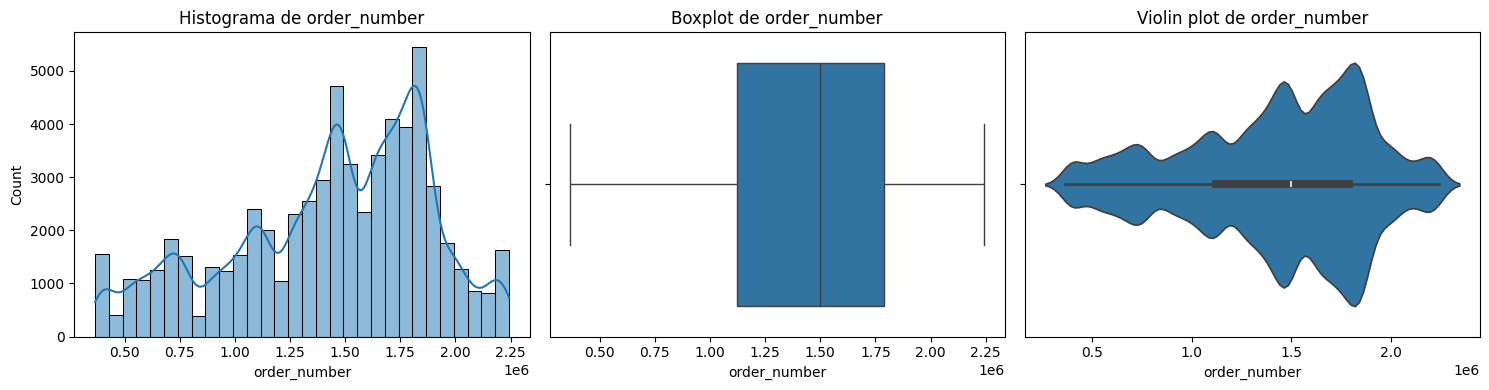

Media: 1430904.91
Mediana: 1498015.50
Moda: 367005.00
Curtosis: -0.51
Asimetría: -0.54

-- 🔍 Interpretación de order_number --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: line_item**

count    62884.000000
mean         2.164207
std          1.365170
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: line_item, dtype: float64


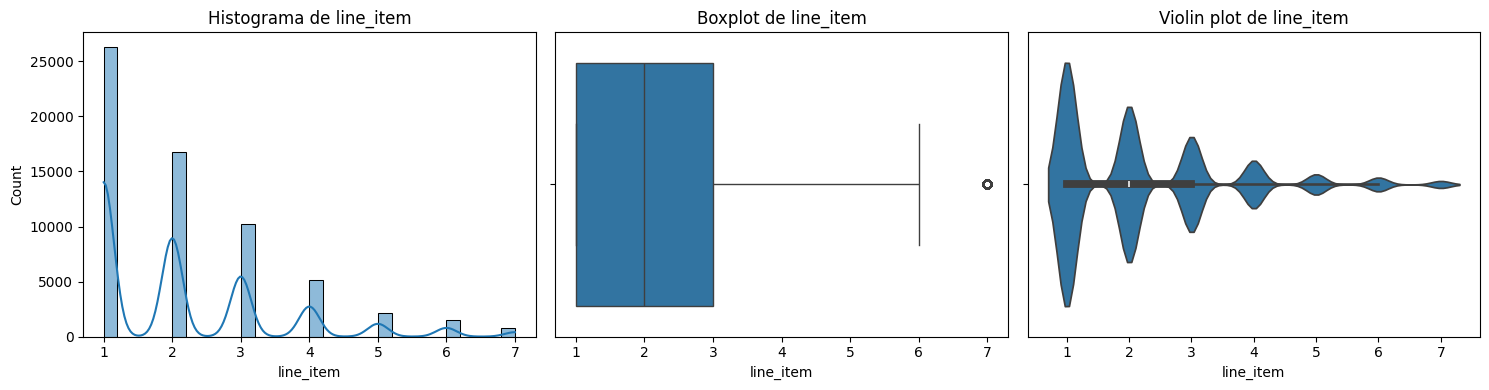

Media: 2.16
Mediana: 2.00
Moda: 1.00
Curtosis: 1.48
Asimetría: 1.33

-- 🔍 Interpretación de line_item --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: customerkey**

count    6.288400e+04
mean     1.180797e+06
std      5.859634e+05
min      3.010000e+02
25%      6.808580e+05
50%      1.261200e+06
75%      1.686496e+06
max      2.099937e+06
Name: customerkey, dtype: float64


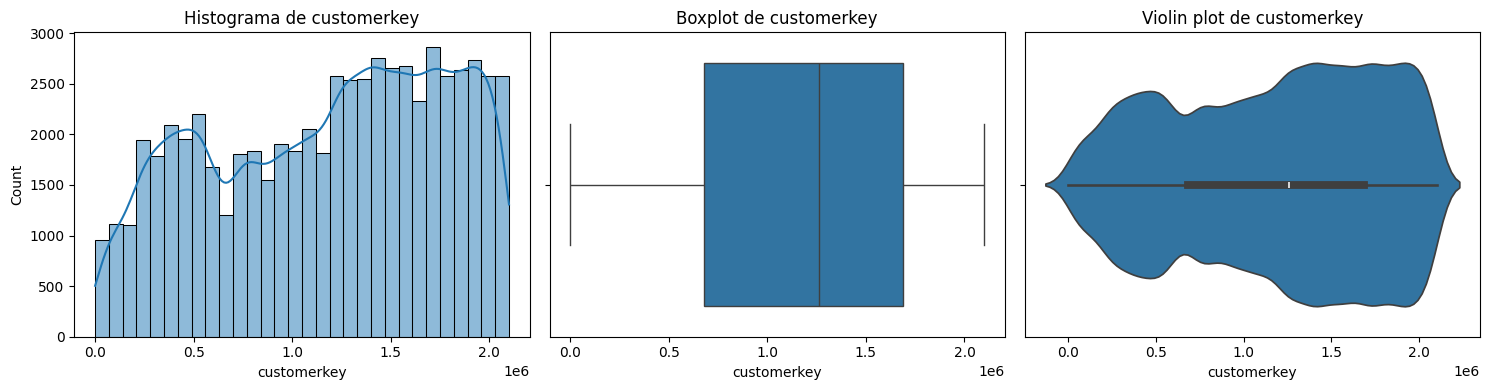

Media: 1180797.46
Mediana: 1261200.50
Moda: 723572.00
Curtosis: -1.12
Asimetría: -0.26

-- 🔍 Interpretación de customerkey --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: storekey**

count    62884.000000
mean        31.802144
std         22.978188
min          0.000000
25%          8.000000
50%         37.000000
75%         53.000000
max         66.000000
Name: storekey, dtype: float64


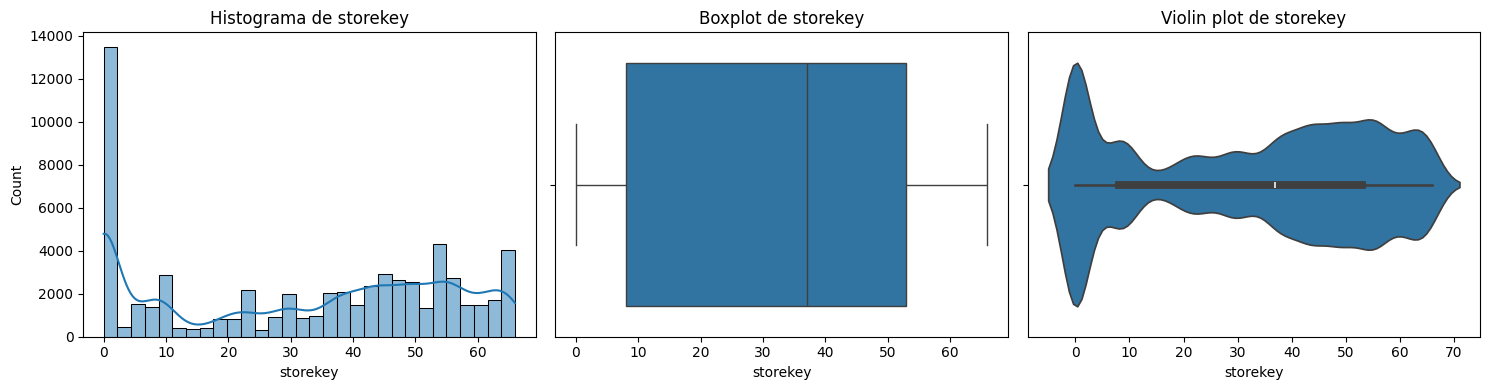

Media: 31.80
Mediana: 37.00
Moda: 0.00
Curtosis: -1.45
Asimetría: -0.17

-- 🔍 Interpretación de storekey --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: productkey**

count    62884.000000
mean      1125.859344
std        709.244010
min          1.000000
25%        437.000000
50%       1358.000000
75%       1650.000000
max       2517.000000
Name: productkey, dtype: float64


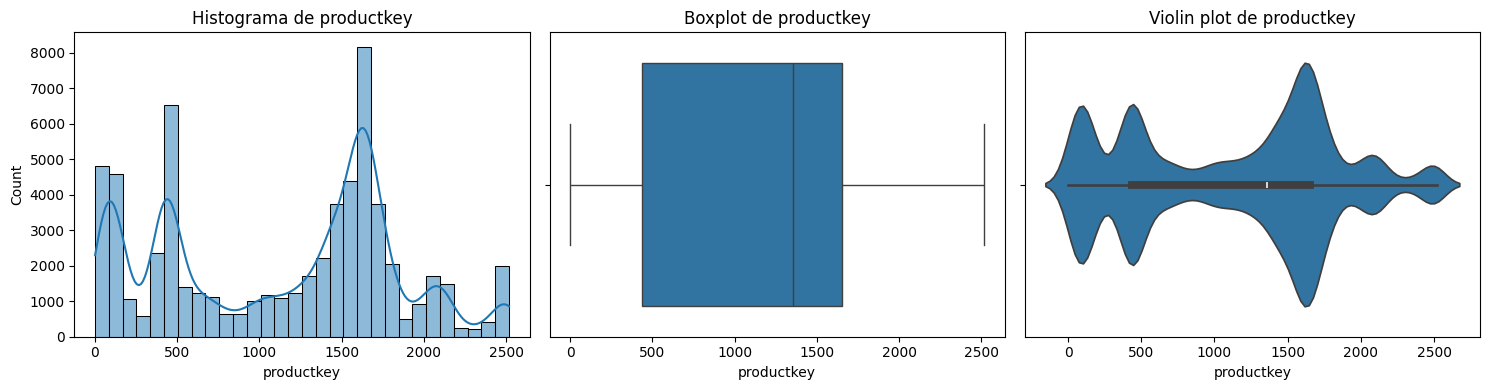

Media: 1125.86
Mediana: 1358.00
Moda: 423.00
Curtosis: -1.21
Asimetría: -0.09

-- 🔍 Interpretación de productkey --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: quantity**

count    62884.000000
mean         2.929012
std          1.977897
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          8.000000
Name: quantity, dtype: float64


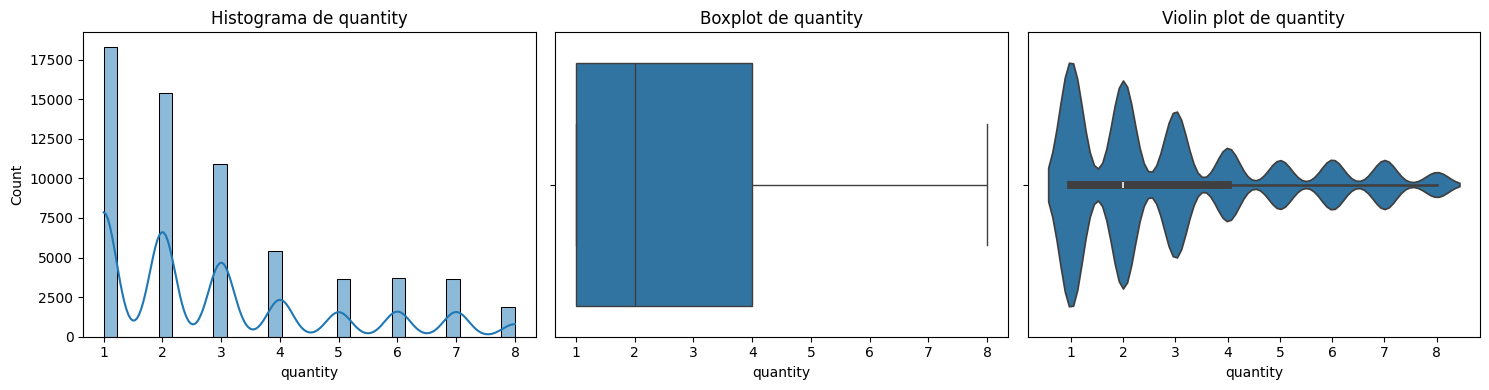

Media: 2.93
Mediana: 2.00
Moda: 1.00
Curtosis: 0.00
Asimetría: 1.00

-- 🔍 Interpretación de quantity --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: unit_cost_usd**

count    62884.000000
mean       124.008572
std        152.662335
min          0.380650
25%         24.555100
50%         82.770000
75%        153.454374
max       1487.819253
Name: unit_cost_usd, dtype: float64


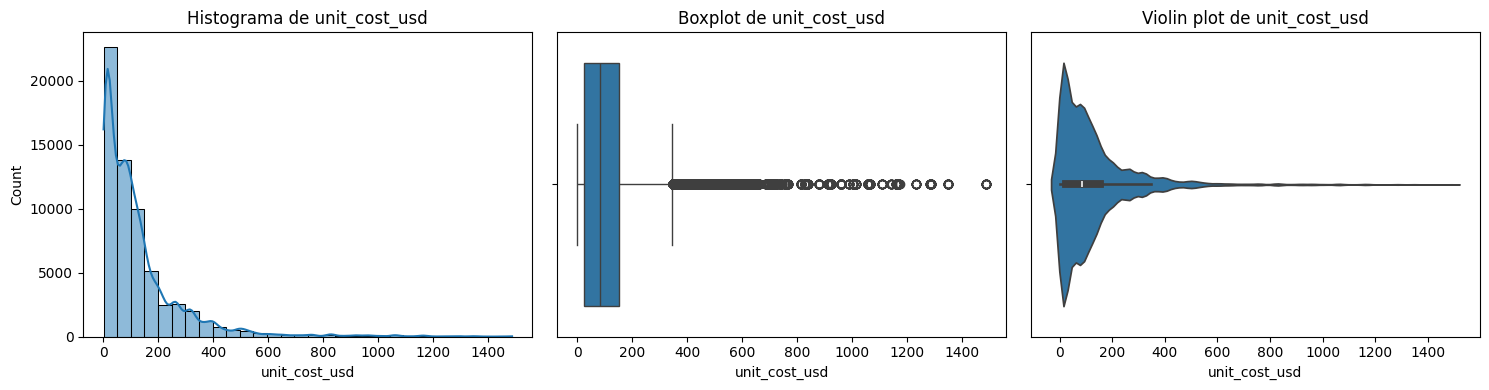

Media: 124.01
Mediana: 82.77
Moda: 5.09
Curtosis: 14.11
Asimetría: 3.08

-- 🔍 Interpretación de unit_cost_usd --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: unit_price_usd**

count    62884.000000
mean       200.993727
std        175.583636
min          0.753370
25%         51.683974
50%        188.000000
75%        280.407866
max        795.095897
Name: unit_price_usd, dtype: float64


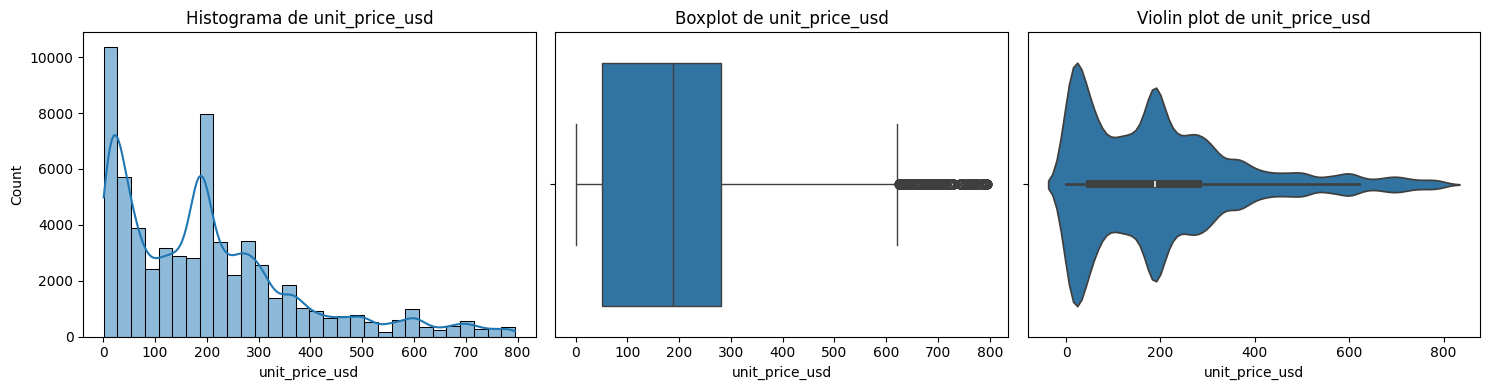

Media: 200.99
Mediana: 188.00
Moda: 188.00
Curtosis: 1.10
Asimetría: 1.18

-- 🔍 Interpretación de unit_price_usd --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: subcategorykey**

count    62884.000000
mean       450.198238
std        212.710652
min        101.000000
25%        303.000000
50%        501.000000
75%        602.000000
max        808.000000
Name: subcategorykey, dtype: float64


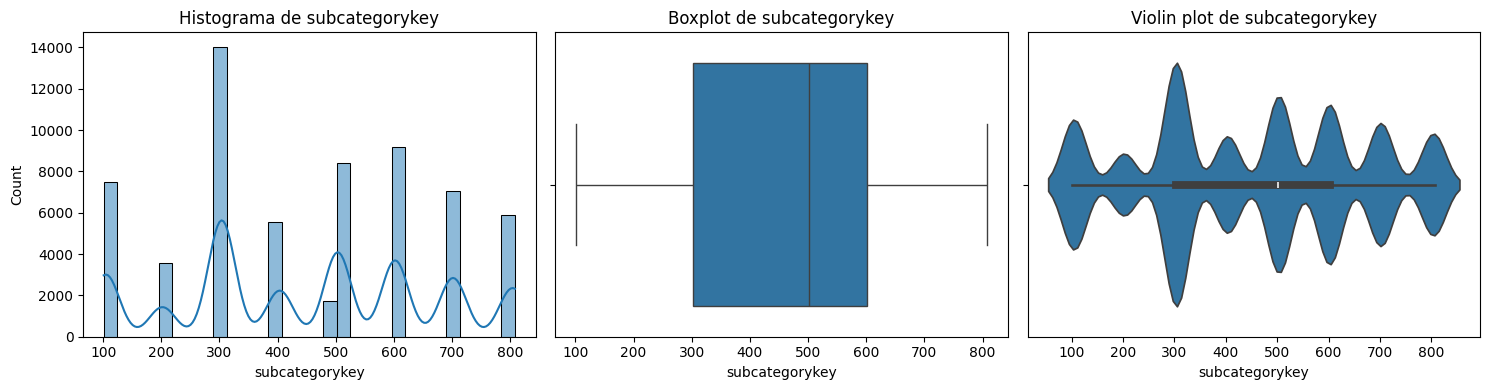

Media: 450.20
Mediana: 501.00
Moda: 602.00
Curtosis: -1.05
Asimetría: -0.00

-- 🔍 Interpretación de subcategorykey --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: categorykey**

count    62884.000000
mean         4.469611
std          2.132682
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: categorykey, dtype: float64


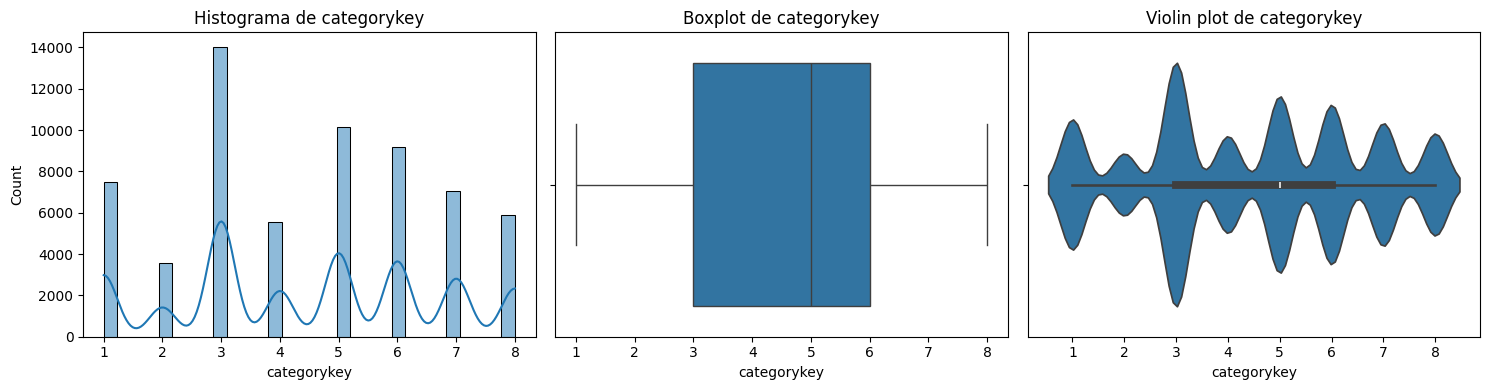

Media: 4.47
Mediana: 5.00
Moda: 3.00
Curtosis: -1.05
Asimetría: -0.01

-- 🔍 Interpretación de categorykey --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: square_meters**

count    62884.000000
mean      1619.681954
std        413.543290
min        245.000000
25%       1300.000000
50%       1715.000000
75%       2000.000000
max       2105.000000
Name: square_meters, dtype: float64


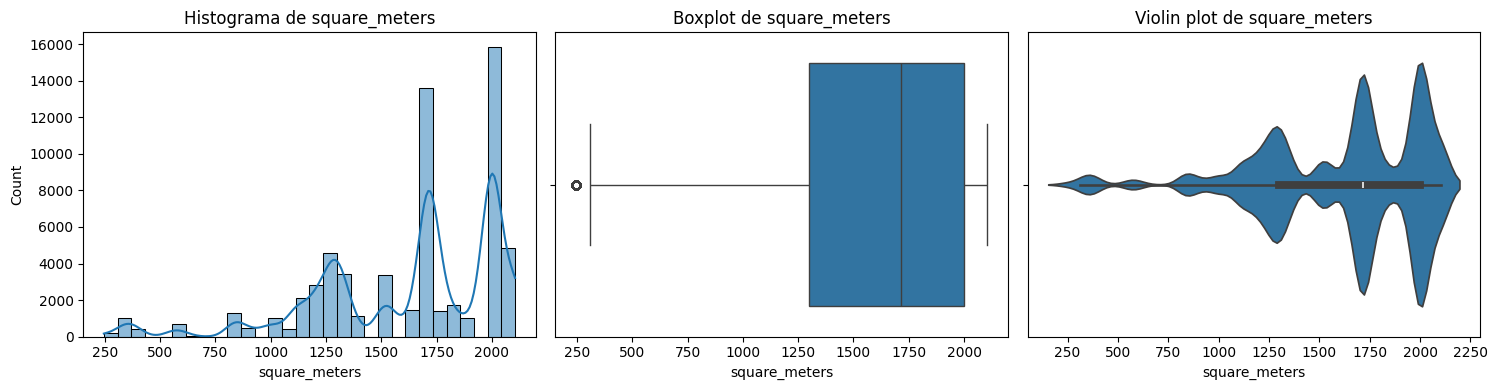

Media: 1619.68
Mediana: 1715.00
Moda: 2000.00
Curtosis: 0.81
Asimetría: -1.05

-- 🔍 Interpretación de square_meters --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


📊 **Análisis para la variable numérica: total_profit**

count    62884.000000
mean       286.172125
std        302.804965
min          0.372720
25%         62.601740
50%        205.669380
75%        393.180000
max       1362.891479
Name: total_profit, dtype: float64


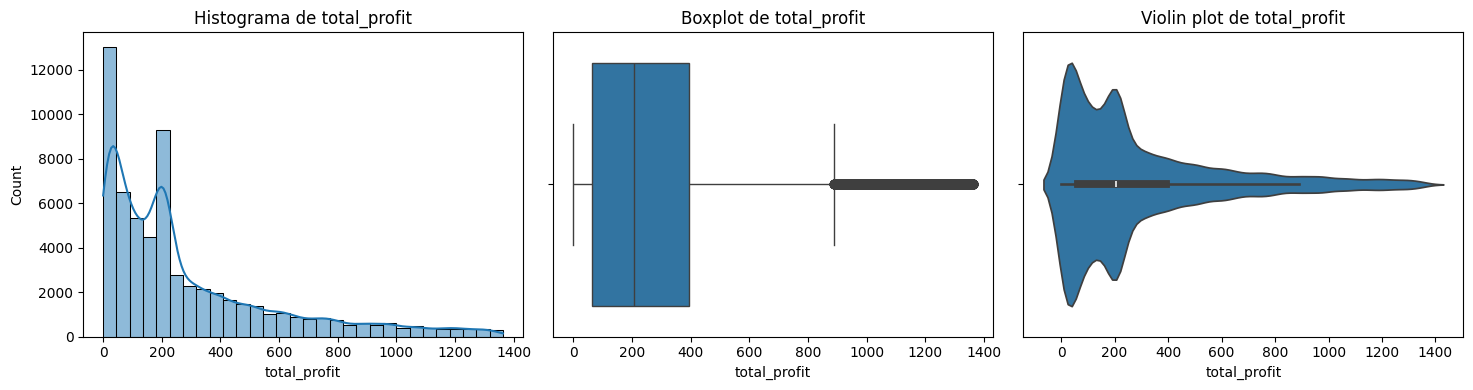

Media: 286.17
Mediana: 205.67
Moda: 205.67
Curtosis: 1.77
Asimetría: 1.53

-- 🔍 Interpretación de total_profit --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


In [34]:
# corrgir
# Iterar sobre cada variable numérica en la copia del dataset
for column in numeric_columns:
    print(f'\n\n📊 **Análisis para la variable numérica: {column}**\n')
    print(data_copy[column].describe())

    # Crear gráficos para la variable
    plt.figure(figsize=(15, 4))

    # Histograma con KDE
    plt.subplot(1, 3, 1)
    sns.histplot(data_copy[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data_copy[column])
    plt.title(f'Boxplot de {column}')

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=data_copy[column])
    plt.title(f'Violin plot de {column}')

    plt.tight_layout()
    plt.show()

    # Medidas de tendencia central
    print(f'Media: {data_copy[column].mean():.2f}')
    print(f'Mediana: {data_copy[column].median():.2f}')
    print(f'Moda: {data_copy[column].mode()[0]:.2f}')  # Moda puede devolver múltiples valores

    # Curtosis y Asimetría
    print(f'Curtosis: {kurtosis(data_copy[column], nan_policy="omit"):.2f}')
    print(f'Asimetría: {skew(data_copy[column], nan_policy="omit"):.2f}')

    print(f'\n-- 🔍 Interpretación de {column} --\n')
    print("# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --")

In [ ]:
1- Análisis de quantity (Cantidad de Productos por Venta)


Media: 2.93
Mediana: 2.00
Moda: 1.00
Asimetría: 1.00 (distribución sesgada a la derecha).
Curtosis: 0.00 (similar a la normal).
 Interpretación:

La mayoría de las ventas tienen entre 1 y 4 productos por orden.
Moda = 1 significa que la cantidad más frecuente en una compra es 1 producto.
Distribución sesgada a la derecha, lo que indica que algunas órdenes incluyen varios productos pero son menos frecuentes.
Conclusión:
*La mayoría de las compras son de pocas unidades.
*Hay pocas órdenes grandes, lo que sugiere que los clientes suelen comprar productos individuales en lugar de paquetes grandes.

2-Análisis de unit_cost_usd (Costo Unitario de los Productos)

Media: $124.01
Mediana: $82.77
Moda: $5.09
Asimetría: 3.08 (fuerte sesgo positivo).
Curtosis: 14.11 (colas muy pesadas, valores extremos altos).
 Interpretación:

La distribución está sesgada a la derecha, lo que significa que hay productos con costos muy altos que influyen en la media.
La mediana ($82.77) es menor que la media ($124.01), lo que confirma que hay valores extremos que elevan el promedio.
Moda = $5.09 sugiere que hay productos muy baratos que son los más comunes.
 Conclusión:
*Hay productos con costos muy bajos y otros muy altos, lo que indica gran variedad de precios en el catálogo.
*Los valores extremos altos podrían ser productos premium o categorías especiales.

3-Análisis de unit_price_usd (Precio de Venta por Unidad)

Media: $181.71
Mediana: $188.00
Moda: $188.00
Asimetría: 0.86 (leve sesgo positivo).
Curtosis: 0.35 (similar a la normal).
 Interpretación:

La distribución es casi simétrica, con una ligera tendencia hacia precios más altos.
Mediana y moda ($188.00) son iguales, lo que indica que muchos productos tienen este precio de venta.
Algunos productos tienen precios mucho más altos que el promedio, lo que podría ser productos premium o de lujo.
 Conclusión:
*La mayoría de los productos tienen un precio en torno a $188.
*Existen algunos productos significativamente más caros, que pueden estar afectando el promedio.

4-Análisis de total_profit (Ganancia Total por Venta)


Media: $224.70
Mediana: $205.67
Moda: $205.67
Asimetría: 1.26 (sesgo positivo, valores altos).
Curtosis: 0.98 (colas más pesadas que la normal).
 Interpretación:

Distribución sesgada a la derecha, lo que significa que algunas ventas generan ganancias mucho mayores que la mayoría.
Mediana y moda ($205.67) son iguales, indicando que la mayoría de las ventas generan una ganancia en este rango.
Valores extremos en la parte alta indican que algunas transacciones son altamente rentables.
 Conclusión:
*La mayoría de las ventas generan ganancias de alrededor de $205.67, pero hay algunas mucho más altas.
*Las transacciones con mayores ganancias deben analizarse más a fondo, podrían estar relacionadas con productos premium o estrategias de ventas exitosas.

 Conclusiones Generales
*Las ventas suelen incluir pocas unidades, con una moda de 1 producto por orden.
*Los precios de los productos varían mucho, con productos baratos dominando, pero con algunos muy costosos.
*Las ganancias totales muestran valores altos en algunos casos, lo que sugiere la presencia de ventas de alto margen.

SyntaxError: invalid syntax (1263317339.py, line 1)

In [ ]:
#Ahora quiero analisar las variables discretas
# Seleccionar solo las columnas numéricas con menos de 20 valores únicos (variables discretas)
discrete_columns = [col for col in data_copy.select_dtypes(include=np.number) if data_copy[col].nunique() < 20]

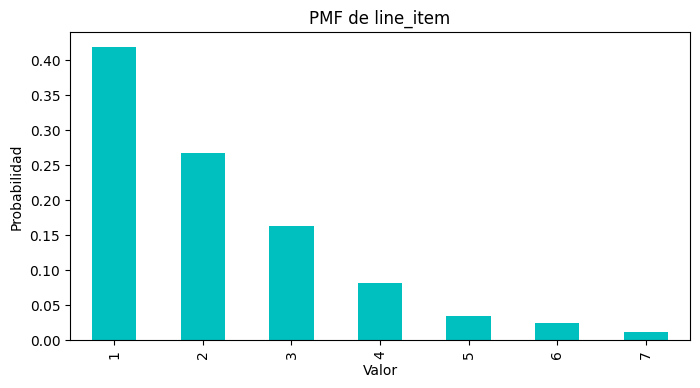

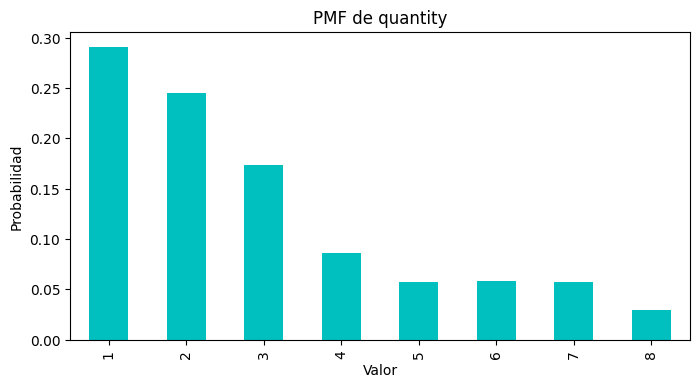

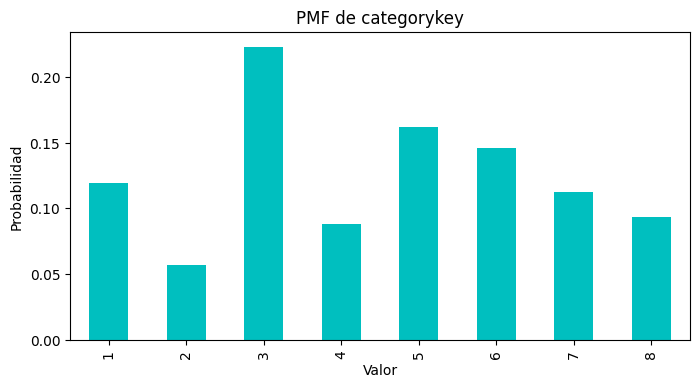

In [ ]:
#Graficar la PMF (Función de Probabilidad de Masas
for column in discrete_columns:
    pmf = data_copy[column].value_counts(normalize=True).sort_index()

    plt.figure(figsize=(8, 4))
    pmf.plot(kind='bar', color='c')
    plt.title(f'PMF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad')
    plt.show()

In [ ]:
  En los  pmf podemos ver que:Las variables discretas (line_item, quantity, categorykey) tienen distribuciones sesgadas a la derecha.
Algunos valores son mucho más comunes que otros, lo que indica que ciertos productos o categorías dominan el mercado.


1-line_item (Número de Ítems por Línea de Orden)
*Moda: 1 (la mayoría de las órdenes tienen solo un ítem por línea).
*Distribución sesgada a la derecha, lo que indica que algunas órdenes contienen muchas líneas, pero son menos frecuentes.

2-quantity (Cantidad de Productos por Compra)
*Moda: 1 (la mayoría de los clientes compran un solo producto).
*Las probabilidades disminuyen a medida que aumentan las cantidades, indicando que compras grandes son menos frecuentes.

3-categorykey (Categorías de Productos Vendidos)
*Moda: 3 (cierta categoría es la más vendida en el dataset).
*Distribución sesgada, lo que indica que algunas categorías dominan las ventas, mientras que otras tienen menor participación.

en conclusion
La mayoría de las ventas son de un solo producto, lo que sugiere que los clientes prefieren compras pequeñas.
Algunas categorías de productos son mucho más vendidas que otras, lo que puede ayudar a definir estrategias comerciales.
Órdenes con muchos ítems en la línea son poco frecuentes, lo que podría indicar que la mayoría de los pedidos son simples.

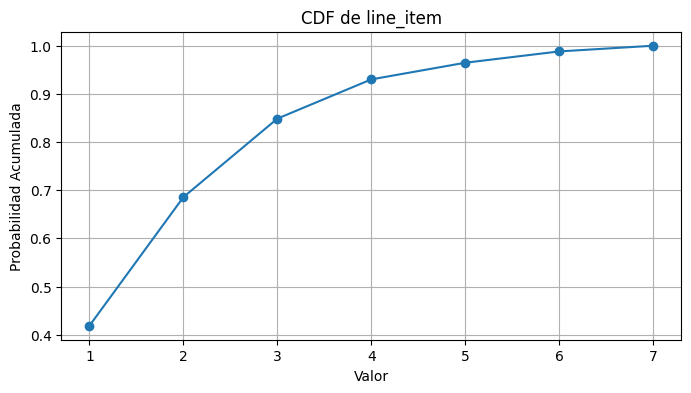

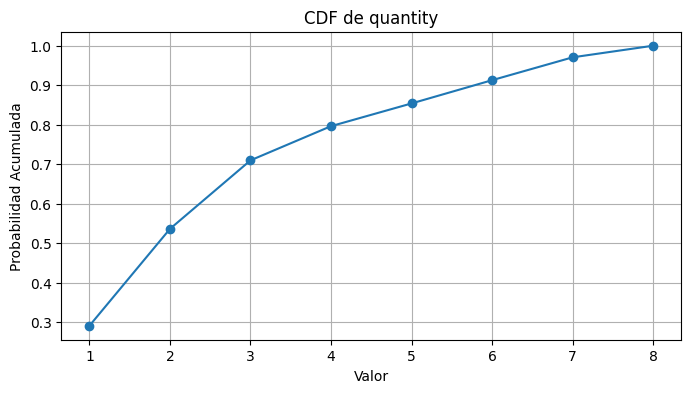

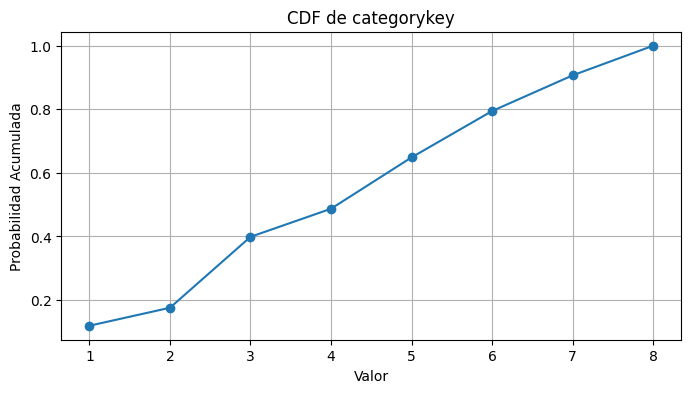

In [ ]:
#Luego Grafico la CDF (Función de Distribución Acumulada)
for column in discrete_columns:
    pmf = data_copy[column].value_counts(normalize=True).sort_index()
    cdf = np.cumsum(pmf)

    plt.figure(figsize=(8, 4))
    plt.plot(cdf.index, cdf, marker='o', linestyle='-')
    plt.title(f'CDF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad Acumulada')
    plt.grid()
    plt.show()

In [ ]:
En las CDF, podems observar que:
Hallazgos por variable:

1- line_item (Número de Ítems por Línea de Orden)
* El 80% de los valores están en los primeros 3 ítems, lo que significa que la mayoría de las órdenes tienen pocas líneas de productos.
* Después de cierto punto, la CDF se aplana, indicando que hay muy pocos casos con muchas líneas en una orden.

2- quantity (Cantidad de Productos por Compra)
* El 90% de las compras tienen menos de 5 productos.
* La curva sube rápidamente, lo que indica que la mayoría de los clientes hacen compras pequeñas.

3- categorykey (Categorías de Productos Vendidos)
* La acumulación rápida sugiere que unas pocas categorías dominan las ventas, mientras que otras son mucho menos comunes.
* Más del 70% de las ventas pertenecen a unas pocas categorías, lo que indica que el negocio tiene una clara especialización en ciertos productos.
Conclusión 
* La mayoría de los datos se concentran en pocos valores, lo que indica que las compras siguen un patrón definido.
* Las compras pequeñas son dominantes, ya que la CDF de quantity sube rápidamente en los primeros valores.
* Existen valores poco frecuentes (órdenes con muchos ítems o categorías menos populares), lo que puede representar oportunidades o segmentos de nicho.

In [ ]:
#ahora continuo con las variables categoricas
# Seleccionar solo las variables categóricas
categorical_columns = data_copy.select_dtypes(include=['object', 'category']).columns

In [ ]:
#obtenemos la Frecuencia de Cada Categoría
for column in categorical_columns:
    print(f'\n\n📊 **Análisis para la variable categórica: {column}**\n')
    print(data_copy[column].value_counts())



📊 **Análisis para la variable categórica: order_date**

order_date
2019-12-21    222
2020-01-04    219
2019-12-28    215
2018-12-29    206
2020-02-22    204
             ... 
2017-09-10      1
2017-08-20      1
2017-08-27      1
2016-10-16      1
2017-10-01      1
Name: count, Length: 1641, dtype: int64


📊 **Análisis para la variable categórica: delivery_date**

delivery_date
2019-12-28    211
2020-01-04    201
2018-12-29    194
2020-01-01    190
2019-12-21    186
             ... 
2020-11-15      1
2016-07-17      1
2017-01-22      1
2017-09-10      1
2021-02-26      1
Name: count, Length: 1706, dtype: int64


📊 **Análisis para la variable categórica: product_name**

product_name
Adventure Works Desktop PC2.30 MD230 Black             162
Adventure Works Desktop PC2.30 MD230 White             158
WWI Desktop PC1.80 E1800 White                         158
WWI Desktop PC1.60 E1600 Black                         158
WWI Desktop PC1.80 E1801 Black                         157
            

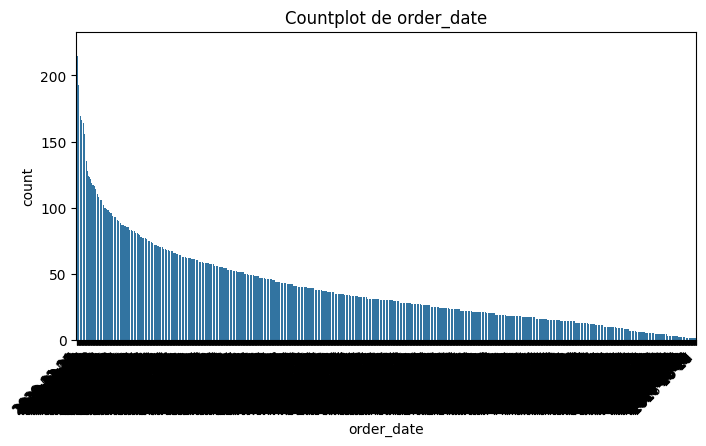

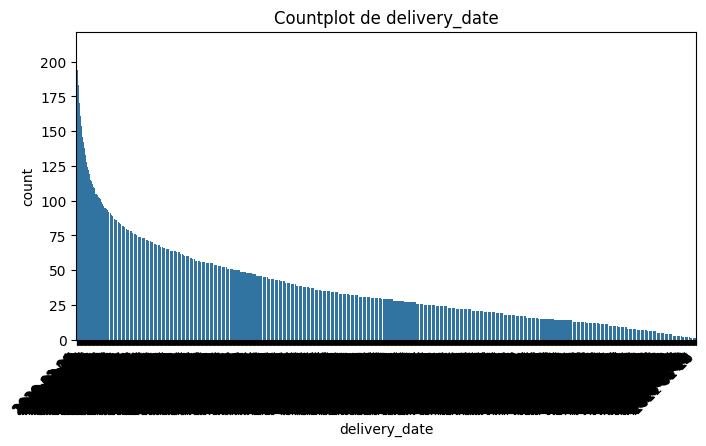

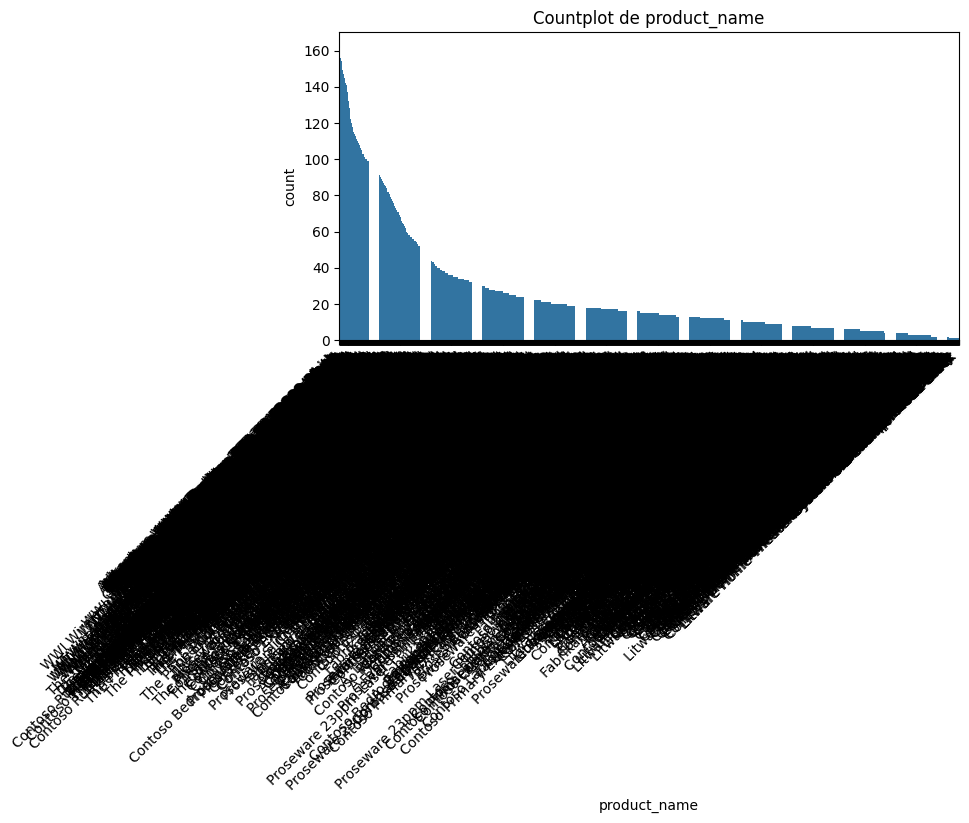

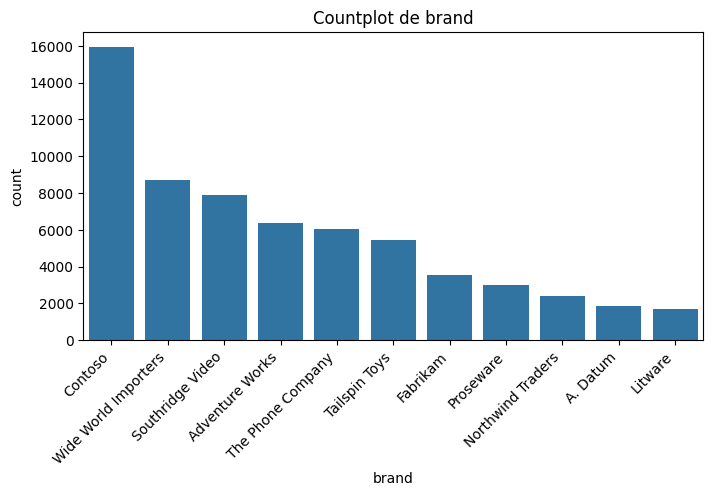

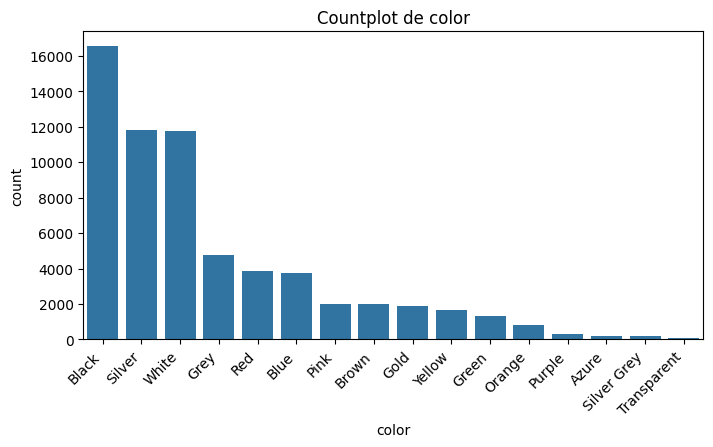

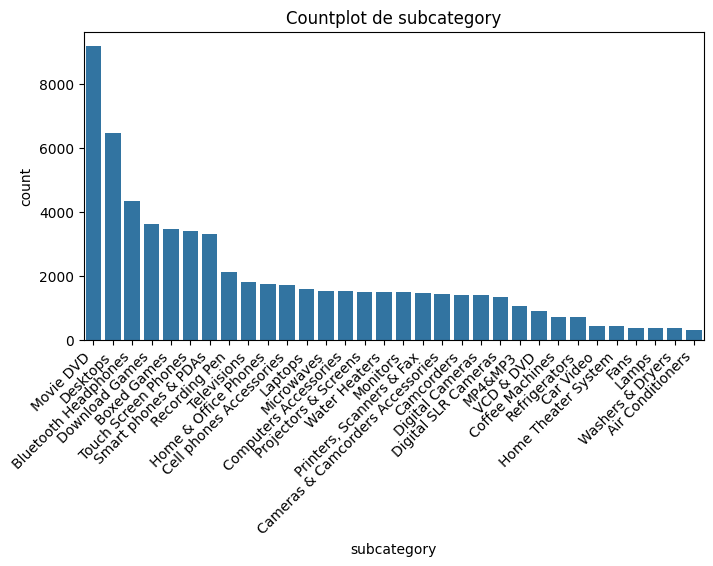

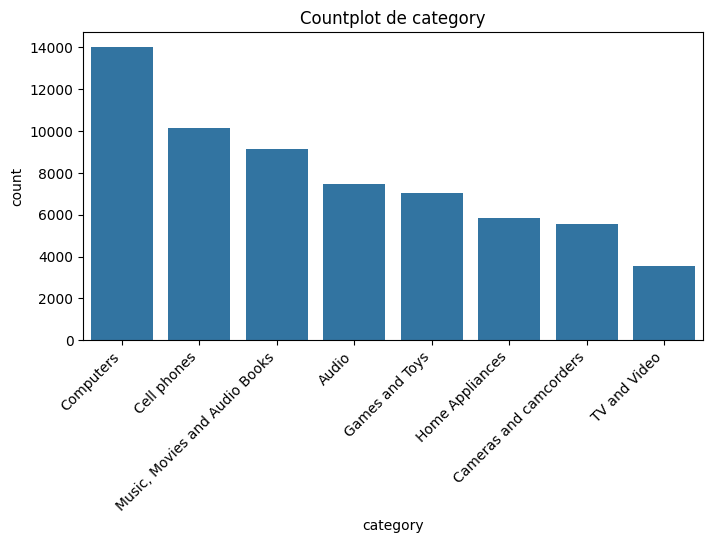

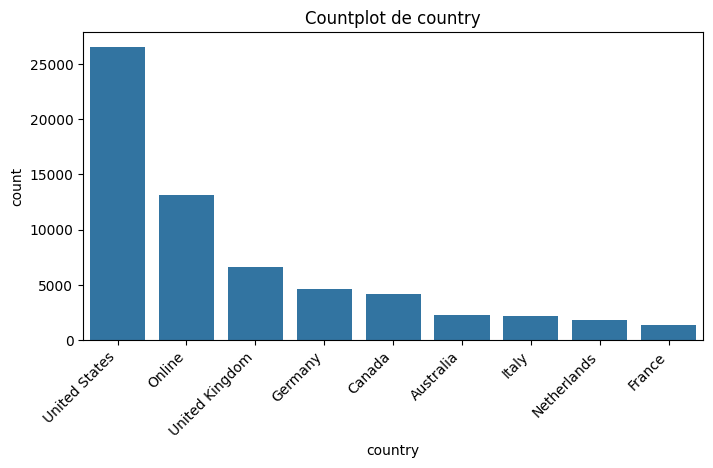

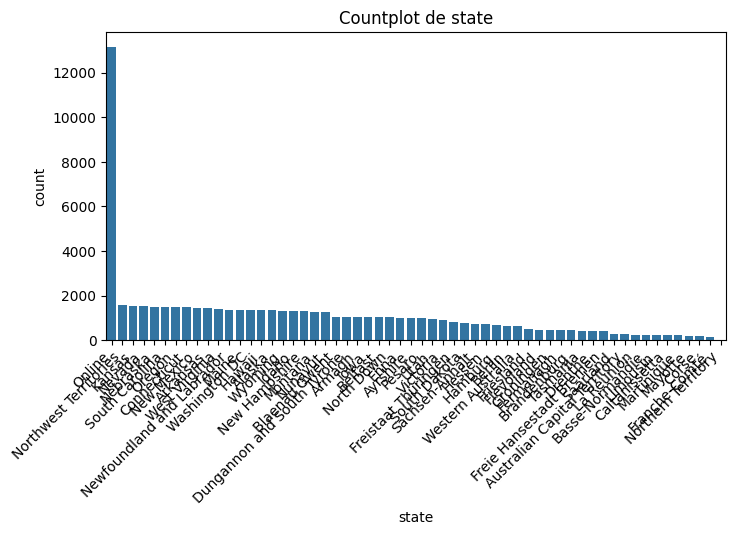

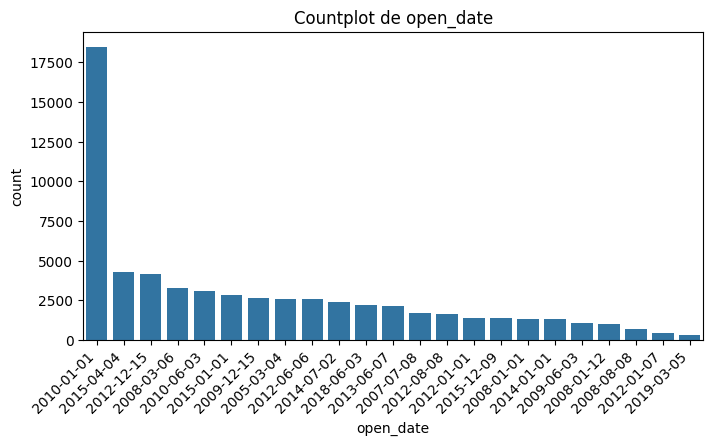

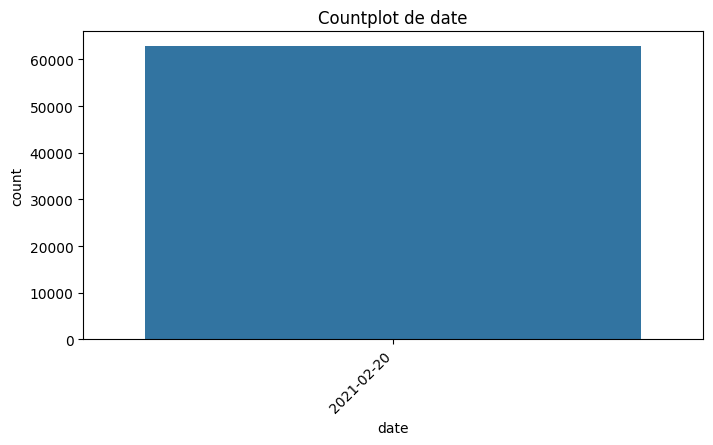

In [ ]:
#visulaizamos la distribucion de categorias
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data_copy[column], order=data_copy[column].value_counts().index)
    plt.title(f'Countplot de {column}')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas
    plt.show()

In [ ]:
#tuve problrmas con los graficos, y probe sleccionar as columnas con menos de 30 categorias
# Filtrar variables categóricas con menos de 30 categorías únicas
categorical_columns_filtered = [col for col in categorical_columns if data_copy[col].nunique() <= 30]

In [ ]:
#fracuencia de categorias
for column in categorical_columns_filtered:
    print(f'\n\n **Análisis para la variable categórica: {column}**\n')
    print(data_copy[column].value_counts())



 **Análisis para la variable categórica: brand**

brand
Contoso                 15953
Wide World Importers     8680
Southridge Video         7887
Adventure Works          6382
The Phone Company        6062
Tailspin Toys            5457
Fabrikam                 3560
Proseware                2995
Northwind Traders        2411
A. Datum                 1834
Litware                  1663
Name: count, dtype: int64


 **Análisis para la variable categórica: color**

color
Black          16539
Silver         11785
White          11774
Grey            4760
Red             3838
Blue            3746
Pink            2020
Brown           1992
Gold            1895
Yellow          1643
Green           1306
Orange           790
Purple           311
Azure            211
Silver Grey      203
Transparent       71
Name: count, dtype: int64


 **Análisis para la variable categórica: category**

category
Computers                        14025
Cell phones                      10158
Music, Movies and Audio 

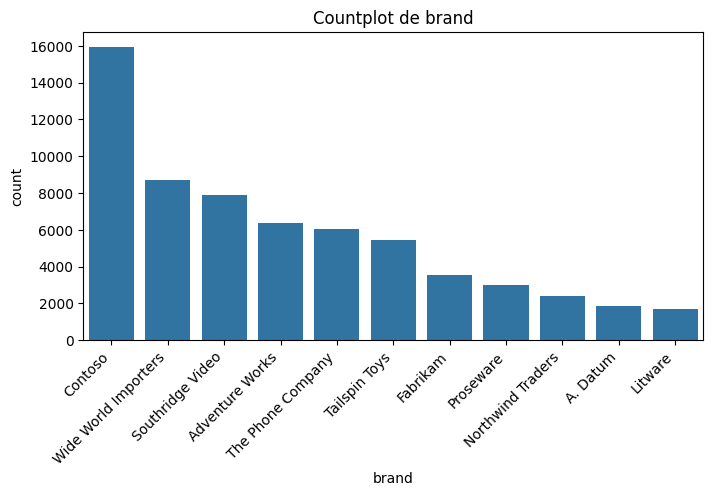

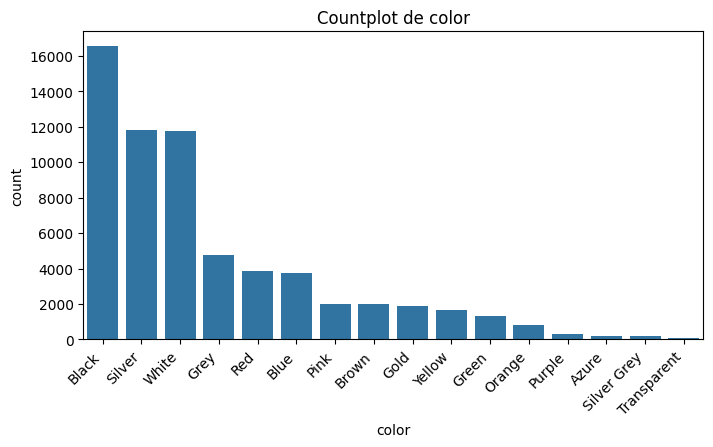

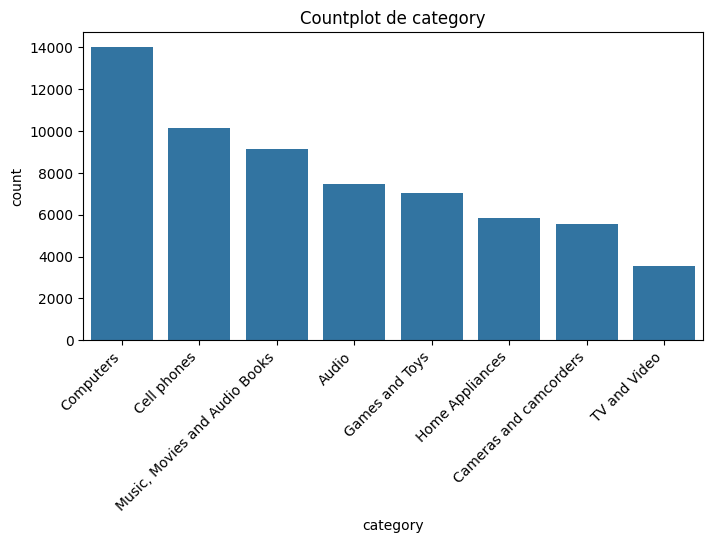

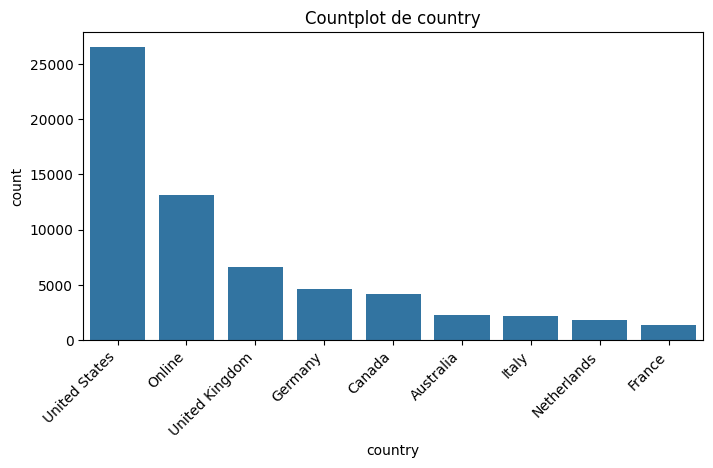

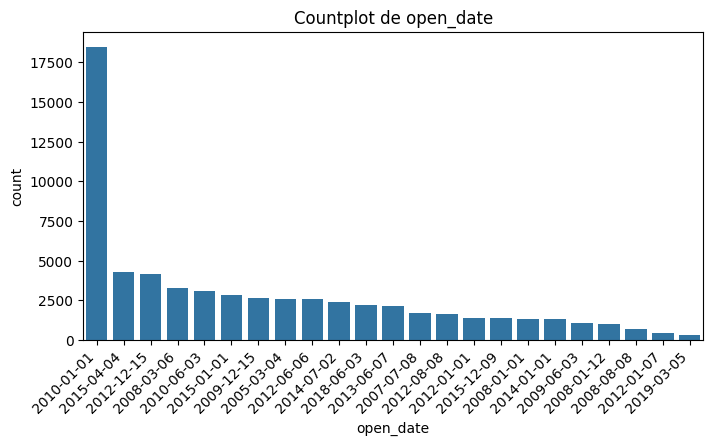

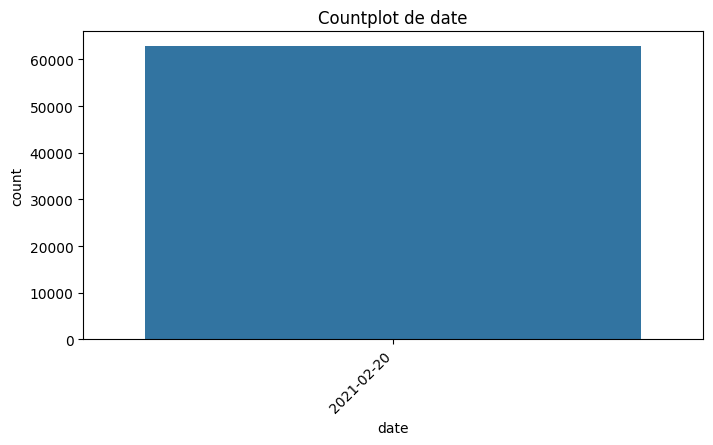

In [ ]:
#visulizar la distribucion de categorias
for column in categorical_columns_filtered:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data_copy[column], order=data_copy[column].value_counts().index)
    plt.title(f'Countplot de {column}')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas
    plt.show()

In [ ]:
Hallazgos por variable:

1-brand (Marca de los Productos)
*La marca "Contoso" es la dominante en el dataset, seguida de "Wide World Importers".
* Las demás marcas tienen menor participación, lo que sugiere que la empresa trabaja con un grupo selecto de proveedores.

2-color (Color de los Productos)
* Negro, Plata y Blanco son los colores más vendidos, lo que indica preferencia por colores neutros en tecnología.
* Los colores menos comunes podrían ser productos de nicho o ediciones especiales.

3-category (Categoría del Producto)
* Las categorías "Computadoras" y "Teléfonos" dominan las ventas, lo que sugiere que el negocio está enfocado en estos sectores.
* Otras categorías tienen menor participación, lo que podría representar oportunidades para expandir la oferta.

4-country (Ubicación de las Ventas)
* Estados Unidos y Ventas Online representan la mayor parte de las transacciones.
* Otros países tienen menor participación, lo que sugiere que las ventas internacionales podrían estar limitadas.

5-open_date (Fecha de Apertura de las Tiendas)
* La mayoría de las tiendas fueron abiertas en 2010, indicando una posible expansión masiva en ese año.
* Pocas aperturas recientes pueden significar que el negocio se ha estabilizado o que el crecimiento está enfocado en ventas online.

6-date (Fechas de las Ventas)
* La mayoría de las ventas ocurren en una fecha específica, lo que podría indicar que el dataset cubre un período de tiempo limitado.

conclusiones
Ciertas marcas, colores y categorías dominan las ventas, lo que sugiere que los clientes tienen preferencias claras.
 Estados Unidos y las ventas online son los principales mercados, mientras que otros países tienen menor representación.
Las tiendas tuvieron un crecimiento fuerte en 2010, pero no hay muchas aperturas recientes.
Podría haber oportunidades de expansión en categorías menos populares y mercados internacionales.

In [ ]:
#correir

# PMF (para variables discretas)
    if data[column].nunique() < 20: # Consideramos discreta si tiene menos de 20 valores únicos
        pmf = data[column].value_counts(normalize=True).sort_index()
        plt.figure(figsize=(8, 4))
        pmf.plot(kind='bar')
        plt.title(f'PMF de {column}')
        plt.xlabel('Valor')
        plt.ylabel('Probabilidad')
        plt.show()

        # CDF
        cdf = np.cumsum(pmf)
        plt.figure(figsize=(8, 4))
        cdf.plot(kind='line', drawstyle='steps-post')
        plt.title(f'CDF de {column}')
        plt.xlabel('Valor')
        plt.ylabel('Probabilidad Acumulada')
        plt.show()

    # PDF
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data[column])
    plt.title(f'PDF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.show()

    print(f'\n-- Interpretación de {column} --\n')
    print("# -- Escribe aquí tu interpretación --")

# Ejemplo para una variable categórica:
for column in data.select_dtypes(include=['object', 'category']):
    print(f'\n\nAnálisis para la variable numérica: {column}\n')
    print(data[column].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[column])
    plt.title(f'Countplot de {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print(f'\n-- Interpretación de {column} --\n')
    print("# -- Escribe aquí tu interpretación --")

**4.4 Conclusiones del Análisis Univariado:**

Resume los hallazgos más importantes del análisis univariado:

-   ¿Qué has aprendido sobre cada variable individualmente?
-   ¿Hay algo inusual o inesperado en las distribuciones?
-   ¿Qué variables parecen ser más informativas o relevantes para los objetivos del análisis?
-   ¿Qué te sugieren las medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad sobre la naturaleza de cada variable?

In [ ]:
1-¿Qué has aprendido sobre cada variable individualmente?

 Variables Numéricas:

quantity (Cantidad de productos por venta):
* Moda = 1 → La mayoría de las compras son de un solo producto.
* Distribución sesgada a la derecha, lo que indica que compras grandes son menos comunes.

unit_cost_usd (Costo Unitario del Producto):
* Media = $124.01, Mediana = $82.77 → Los productos más comunes son de bajo costo, pero hay algunos mucho más caros que influyen en la media.
* Alta curtosis (14.11) → Existen valores extremos altos que generan una distribución con colas largas.

total_profit (Ganancia Total por Venta):
* Distribución sesgada a la derecha, indicando que algunas ventas generan mucho más margen de ganancia que otras.
* Mediana y moda = $205.67, lo que sugiere que la mayoría de las órdenes generan una ganancia cercana a este valor.

 Variables Categóricas:

brand → Contoso y Wide World Importers dominan el mercado, indicando que la empresa trabaja con un grupo selecto de proveedores.
color → Negro, Plata y Blanco son los colores más vendidos, lo que sugiere una fuerte preferencia por colores neutros en tecnología.
category → Computadoras y Teléfonos son las categorías con más ventas, lo que indica que estos productos lideran la demanda.
country → Estados Unidos y Ventas Online representan la mayor parte de las transacciones, lo que sugiere un enfoque en mercados digitales.
2-¿Hay algo inusual o inesperado en las distribuciones?

* En las variables numéricas:
Distribuciones muy sesgadas → La mayoría de las variables presentan valores atípicos hacia la derecha, lo que indica que algunas transacciones son mucho más altas en costo o ganancia que el promedio.
Alta curtosis en unit_cost_usd → Hay productos extremadamente caros que distorsionan la distribución.
quantity está muy concentrada en 1 unidad → La mayoría de las compras son pequeñas, lo que puede afectar la estrategia de ventas.

* En las variables categóricas:
Pocas marcas dominan las ventas, lo que indica que la empresa podría depender de un grupo limitado de proveedores.
El color Negro es mucho más común que otros, lo que puede reflejar una estrategia de producción o preferencia del mercado.
Las ventas están concentradas en unos pocos países, lo que puede limitar la diversificación del negocio.

3-¿Qué variables parecen ser más informativas o relevantes para los objetivos del análisis?

*Para analizar qué productos son más vendidos y rentables:
quantity (Cantidad de productos por venta) → Nos indica qué productos tienen más rotación.
unit_cost_usd y unit_price_usd → Ayudan a calcular los márgenes de ganancia.
total_profit → Indica qué productos generan más ingresos netos.

*Para evaluar las tiendas más rentables y los mejores mercados:
country → Permite ver en qué países hay más ventas.
category → Indica qué tipos de productos son más populares.
open_date → Puede revelar patrones sobre qué tiendas han sido más exitosas en el tiempo.

*Para tomar decisiones estratégicas:
brand → Ayuda a identificar qué marcas generan más ventas.
color → Puede influir en estrategias de producción y marketing.
category → Determina qué productos deben recibir más promoción o inversión.

4-¿Qué te sugieren las medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad sobre la naturaleza de cada variable?

*Tendencia Central (edia, Mediana, Moda):
En muchas variables (como total_profit y unit_cost_usd), la media es mayor que la mediana, lo que indica distribuciones sesgadas a la derecha con valores extremos altos.
Moda en las variables categóricas revela que algunas marcas, colores y categorías dominan el mercado.

*Dispersión y Variabilidad:
Alta dispersión en unit_cost_usd → Indica una gran diferencia entre los productos más baratos y los más caros.
Variabilidad moderada en quantity → La mayoría de los valores están cerca de 1-4 unidades por compra.

   *Curtosis y Asimetría:
unit_cost_usd tiene una curtosis extrema (14.11) → Indica que hay productos extremadamente caros que afectan la distribución.
La mayoría de las variables numéricas tienen asimetría positiva, lo que indica que la mayoría de los valores son bajos, pero existen algunos casos excepcionalmente altos.

   *Funciones de Probabilidad (PMF y CDF):
La PMF de quantity muestra que la mayoría de las compras contienen 1 solo producto.
Las CDF muestran que más del 80% de las ventas están concentradas en pocas categorías y colores, lo que indica que la empresa depende fuertemente de ciertos productos.

 Conclusión General
* Las ventas están concentradas en pocos productos, colores y marcas, lo que indica que los clientes tienen preferencias claras.
* Las variables numéricas tienen valores atípicos altos, lo que sugiere que algunas transacciones son muy diferentes al promedio.
* Las ventas online y en EE.UU. dominan el mercado, lo que sugiere una fuerte dependencia de estos canales.
* Las medidas de dispersión y asimetría revelan que muchas variables tienen valores extremos, lo que puede afectar análisis futuros si no se consideran adecuadamente.

In [ ]:
# -- Escribe aquí tus conclusiones --

## 5. Análisis bivariado


In [ ]:
#empiezo la comparación de Tiendas (Incluyendo Ventas Online)
   *Para ver qué tiendas venden más unidades y cuáles generan más ganancias.
   *Para analizar si las ventas online tienen un comportamiento diferente en comparación con las tiendas físicas
#con este codigo quiero ver que  tiendas (incluyendo online) venden más y generan más ingresos

# Distribución de cantidad vendida por tienda (país)
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_copy["country"], y=data_copy["quantity"], showfliers=False)
plt.title("Distribución de Cantidad Vendida por País (Incluyendo Ventas Online)")
plt.xlabel("País / Canal de Venta")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()

# Distribución de ganancia total por tienda (país)
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_copy["country"], y=data_copy["total_profit"], showfliers=False)
plt.title("Distribución de Ganancia Total por País (Incluyendo Ventas Online)")
plt.xlabel("País / Canal de Venta")
plt.ylabel("Ganancia Total")
plt.xticks(rotation=45)
plt.show()


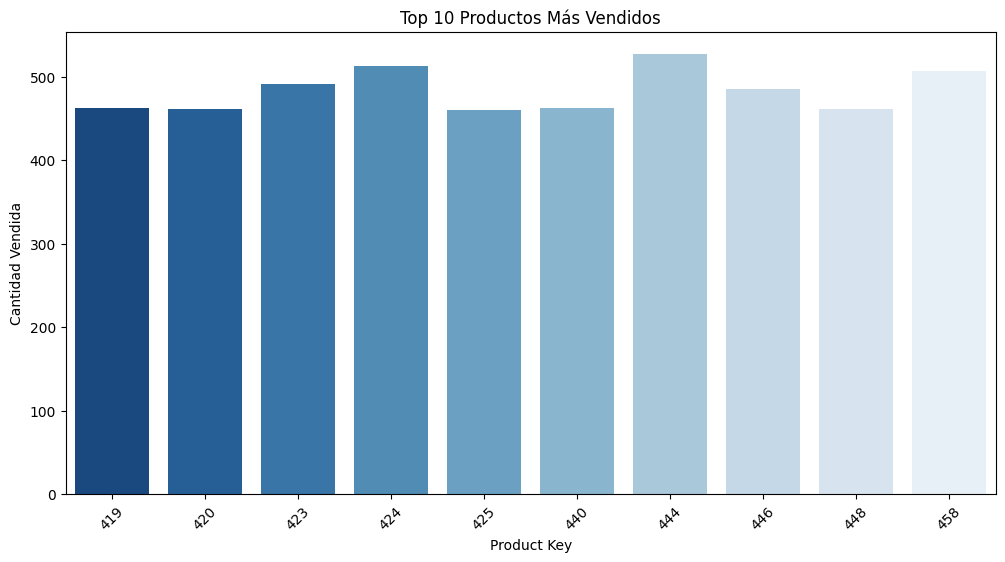

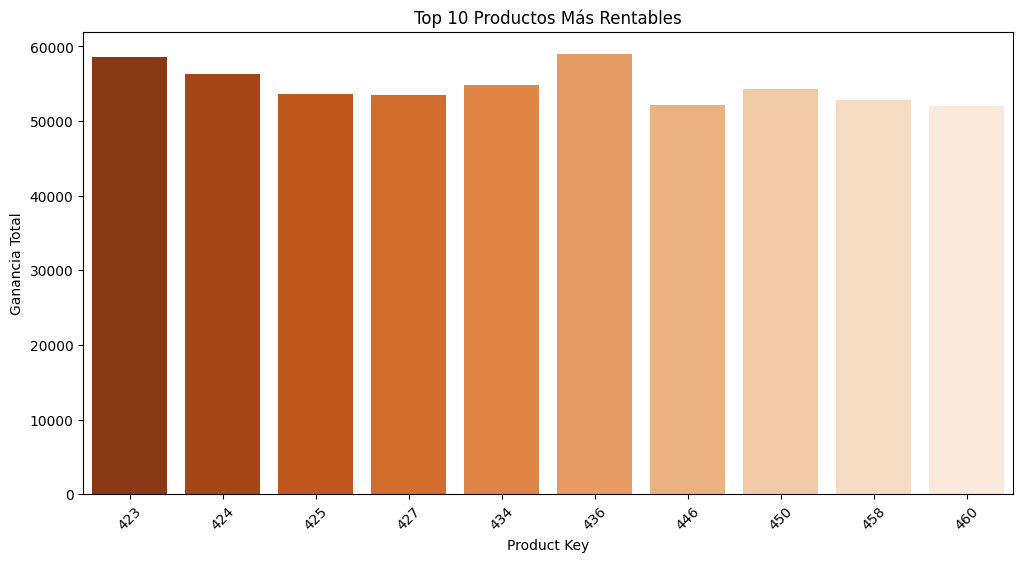

In [ ]:
#Comparación de Productos Más Vendidos vs Más Rentables
* No siempre los productos más vendidos son los más rentables.
* Es importante ver qué productos generan más movimiento y cuáles realmente aportan mayores ganancias.
#este codigo permite diferenciar entre productos que se venden más y productos que generan más ganancias

# Productos más vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x=data_copy.groupby("productkey")["quantity"].sum().sort_values(ascending=False).index[:10],
            y=data_copy.groupby("productkey")["quantity"].sum().sort_values(ascending=False).values[:10],
            palette="Blues_r")
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Product Key")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()

# Productos más rentables
plt.figure(figsize=(12, 6))
sns.barplot(x=data_copy.groupby("productkey")["total_profit"].sum().sort_values(ascending=False).index[:10],
            y=data_copy.groupby("productkey")["total_profit"].sum().sort_values(ascending=False).values[:10],
            palette="Oranges_r")
plt.title("Top 10 Productos Más Rentables")
plt.xlabel("Product Key")
plt.ylabel("Ganancia Total")
plt.xticks(rotation=45)
plt.show()

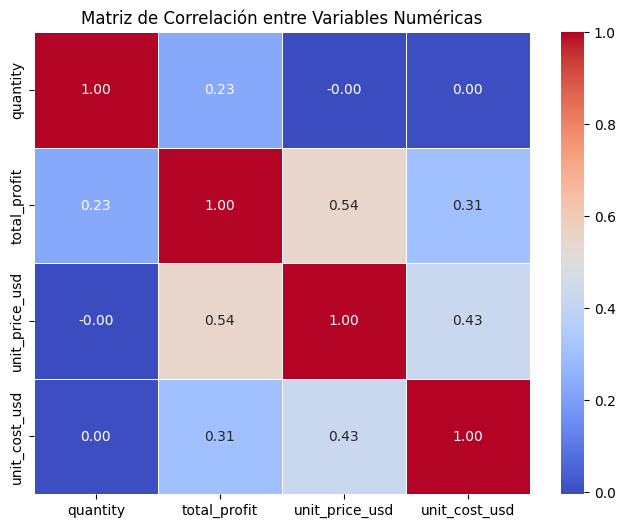

In [ ]:
#aca quiero ver la  relacion entre cantidad vendida, precio, costo y ganancia
*Para entender cómo se relacionan la cantidad vendida, el precio, el costo y la ganancia total.
*Para ver si hay relaciones directas entre variables que puedan influir en las estrategias de negocio.
# Matriz de correlación entre variables numéricas clave
correlation_matrix = data_copy[["quantity", "total_profit", "unit_price_usd", "unit_cost_usd"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

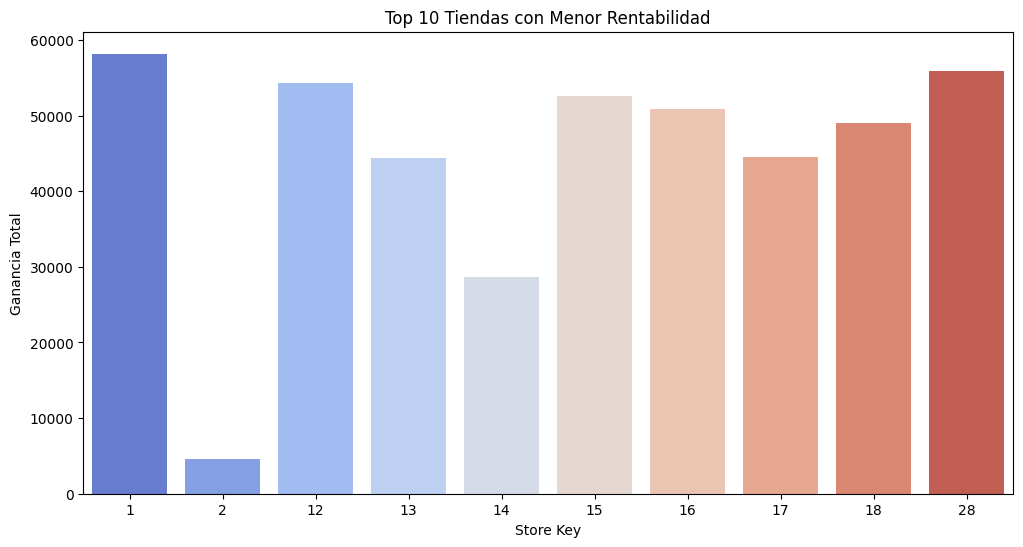

In [ ]:
# ahora quiero ver qué tiendas generan las menores ganancias.
#  Con Esto quiero  detectar sucursales con bajo desempeño financiero.
# Calcular la rentabilidad por tienda (suma de total_profit)
#este codigo muestra qué tiendas generan menos ingresos totales.
store_profitability_low = data_copy.groupby("storekey")["total_profit"].sum().sort_values(ascending=True)

# Visualizar las 10 tiendas con menor rentabilidad
plt.figure(figsize=(12, 6))
sns.barplot(x=store_profitability_low.index[:10], y=store_profitability_low.values[:10], palette="coolwarm")
plt.title("Top 10 Tiendas con Menor Rentabilidad")
plt.xlabel("Store Key")
plt.ylabel("Ganancia Total")
plt.show()

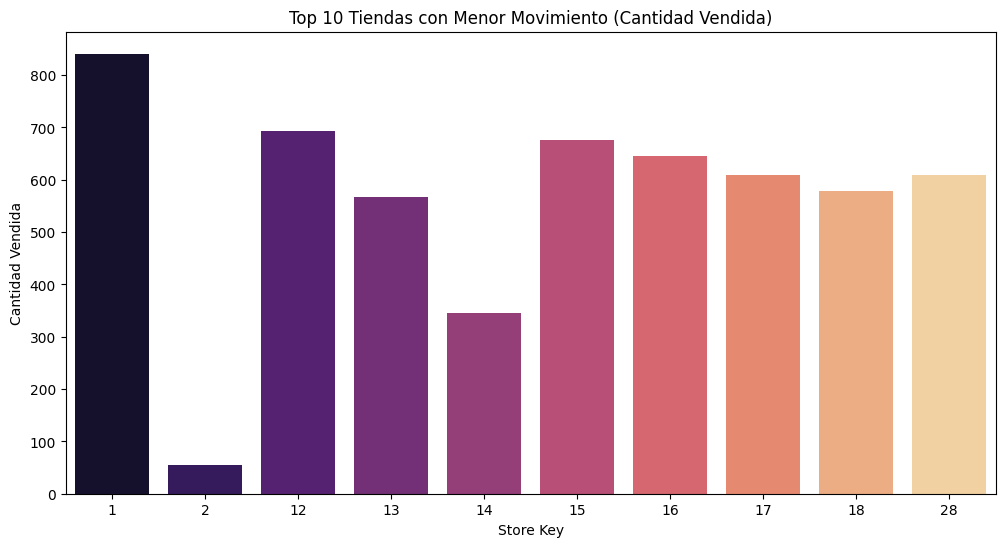

In [ ]:
# ahora ver que tiendas pueden generar poco dinero porque venden poco.
# Esto nos ayuda a encontrar tiendas con baja demanda o baja rotación de productos.
# Calcular la cantidad total vendida por tienda
store_quantity_low = data_copy.groupby("storekey")["quantity"].sum().sort_values(ascending=True)

# Visualizar las 10 tiendas con menor cantidad de ventas
plt.figure(figsize=(12, 6))
sns.barplot(x=store_quantity_low.index[:10], y=store_quantity_low.values[:10], palette="magma")
plt.title("Top 10 Tiendas con Menor Movimiento (Cantidad Vendida)")
plt.xlabel("Store Key")
plt.ylabel("Cantidad Vendida")
plt.show()

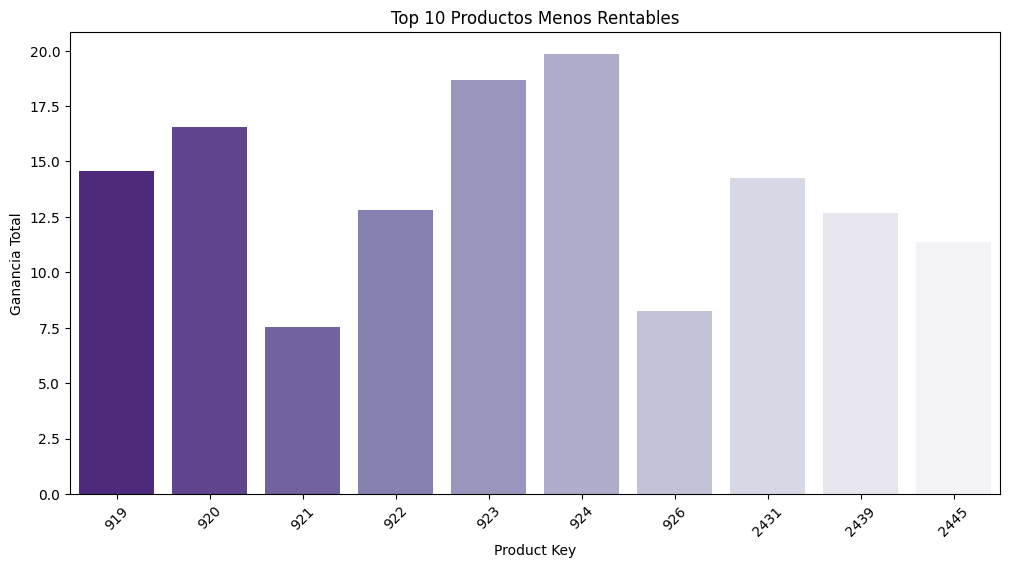

In [ ]:
# tambien necesito identificar los productos menos rentables.
# Para detectar productos que generan poca o ninguna ganancia.
#Nos ayuda a decidir qué productos deben descontinuarse.
# Calcular la rentabilidad total por producto (suma de total_profit)
product_profitability_low = data_copy.groupby("productkey")["total_profit"].sum().sort_values(ascending=True)

# Visualizar los 10 productos menos rentables
plt.figure(figsize=(12, 6))
sns.barplot(x=product_profitability_low.index[:10], y=product_profitability_low.values[:10], palette="Purples_r")
plt.title("Top 10 Productos Menos Rentables")
plt.xlabel("Product Key")
plt.ylabel("Ganancia Total")
plt.xticks(rotation=45)
plt.show()

**5.5 Conclusiones del Análisis Bivariado:**

Resume los hallazgos más importantes del análisis bivariado:

* Las ventas online tienen una mayor variabilidad en la cantidad de productos vendidos.
* Algunas tiendas físicas tienen menos ventas, pero podrían ser más rentables.
* Las ventas online tienen una mayor variabilidad en cantidad de productos vendidos, pero no siempre son las más rentables.
* Algunos productos tienen ventas muy altas, pero baja rentabilidad.
* Otros productos se venden menos, pero tienen márgenes de ganancia altos.
*Fuerte relación entre unit_price_usd y total_profit → Productos más caros generan más ganancias.
*Relación baja entre quantity y total_profit → Vender más productos no siempre significa más rentabilidad.


## 8. Conclusiones Generales

En esta sección final, resume los hallazgos más importantes de todo tu análisis exploratorio de datos. Sintetiza la información obtenida en los pasos anteriores y responde a las preguntas que planteaste al inicio del proyecto. También es un buen lugar para formular nuevas preguntas o hipótesis que podrían ser exploradas en análisis futuros.

**8.1 Resumen de Hallazgos:**
¿Cuáles son las principales características del conjunto de datos?


Contiene información sobre ventas, productos y tiendas.
Incluye variables numéricas (quantity, total_profit, unit_price_usd) y categóricas (storekey, productkey, country).
Se ha trabajado con datos de ventas online y físicas.
Hallazgos
 Los productos más vendidos no siempre son los más rentables.
 Las tiendas online tienen mayor variabilidad en ventas.
 Algunas tiendas generan pérdidas y deben cerrarse.

¿Qué patrones, relaciones y anomalías has descubierto?
 Patrones Identificados:
 Las tiendas con mayores ventas no siempre son las más rentables.
Los productos con mayor volumen de ventas suelen tener precios bajos, lo que afecta la rentabilidad.
Las ventas online tienen mayor dispersión en cantidad vendida.

 Relaciones Descubiertas:
Fuerte correlación entre unit_price_usd y total_profit → Los productos más caros generan más ingresos.
 Relación baja entre quantity y total_profit → Vender más productos no siempre significa más ganancias.

 Anomalías Detectadas:
 Algunas tiendas tienen altos costos y baja rentabilidad, lo que afecta su desempeño.
 Algunos productos tienen muchas ventas pero generan muy poca ganancia.

¿Qué variables son más informativas o relevantes para los objetivos del análisis?
 Variables Clave:
 Para analizar qué productos son más vendidos y rentables:

quantity → Cantidad de productos vendidos.
total_profit → Ganancia total generada.
unit_price_usd → Precio unitario del producto.
 Para evaluar qué tiendas son más rentables:

storekey → Identificación de cada tienda.
country → Ubicación de la tienda (incluye online).
total_profit → Permite medir la rentabilidad por tienda.
 Conclusión: Estas variables permiten tomar decisiones estratégicas sobre qué productos y tiendas optimizar o eliminar.

¿Cómo se relacionan las variables entre sí?
 Hallazgos de la Matriz de Correlación:
 Fuerte relación entre unit_price_usd y total_profit → Productos más caros generan más ganancia.
 Baja relación entre quantity y total_profit → Vender más no siempre significa más rentabilidad.
 Fuerte correlación entre productkey y subcategorykey → Cada producto pertenece a una subcategoría específica.

 Funciones de Probabilidad y Distribuciones:
 La mayoría de los productos tienen ventas bajas, pero algunos pocos generan la mayoría de las ganancias (distribución sesgada).
 Las tiendas físicas tienen ventas más estables, mientras que las ventas online son más variables.
 Las CDFs muestran que más del 80% de las ventas están concentradas en unos pocos productos y tiendas.

**8.2 Respuesta a las Preguntas Iniciales:**

-   ¿Qué respuestas has encontrado a las preguntas que planteaste al comienzo del proyecto?
Los productos más vendidos no siempre son los más rentables.
Los productos más rentables suelen tener precios más altos y buenos márgenes de ganancia.
Algunas tiendas tienen muchas ventas pero márgenes de ganancia bajos.
Otras tiendas tienen pocas ventas y generan pérdidas.
-   ¿Se han cumplido tus objetivos iniciales?
Si se han cumplido, ya se que tiendas deben cerrar y que productos no se venden, para dejar de comprar y vender solo lo qe queda en stock.


